In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr
import operator
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import math

print('Imports complete.')

Imports complete.


In [ ]:
path = '/content/drive/MyDrive/ransm.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

Flow ID    Source IP  ...  Idle Min   Label
0   172.217.2.174-10.42.0.211-443-51023-6  10.42.0.211  ...         0  BENIGN
1   172.217.2.174-10.42.0.211-443-51023-6  10.42.0.211  ...         0  BENIGN
2  172.217.12.174-10.42.0.211-443-34259-6  10.42.0.211  ...         0  BENIGN
3   172.217.10.74-10.42.0.211-443-55509-6  10.42.0.211  ...         0  BENIGN
4   172.217.2.174-10.42.0.211-443-44852-6  10.42.0.211  ...         0  BENIGN

[5 rows x 85 columns]

In [ ]:
df.tail()

Flow ID  ...                   Label
759486        10.42.0.151-10.42.0.1-53849-53-17  ...  RANSOMWARE_WANNALOCKER
759487  10.42.0.151-96.126.100.203-34559-123-17  ...  RANSOMWARE_WANNALOCKER
759488        10.42.0.151-10.42.0.1-23177-53-17  ...  RANSOMWARE_WANNALOCKER
759489        10.42.0.151-10.42.0.1-30407-53-17  ...  RANSOMWARE_WANNALOCKER
759490   10.42.0.151-104.192.108.22-60113-443-6  ...  RANSOMWARE_WANNALOCKER

[5 rows x 85 columns]

In [ ]:
df['Label'].value_counts()

BENIGN                    410548
RANSOMWARE_SVPENG          54161
RANSOMWARE_PORNDROID       46082
RANSOMWARE_KOLER           44555
RANSOMWARE_RANSOMBO        39859
RANSOMWARE_CHARGER         39551
RANSOMWARE_SIMPLOCKER      36340
RANSOMWARE_WANNALOCKER     32701
RANSOMWARE_JISUT           25672
RANSOMWARE_LOCKERPIN       25307
RANSOMWARE_PLETOR           4715
Name: Label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759491 entries, 0 to 759490
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      759491 non-null  object 
 1   Source IP                    759491 non-null  object 
 2   Source Port                  759491 non-null  int64  
 3   Destination IP               759491 non-null  object 
 4   Destination Port             759491 non-null  int64  
 5   Protocol                     759491 non-null  int64  
 6   Timestamp                    759491 non-null  object 
 7   Flow Duration                759491 non-null  int64  
 8   Total Fwd Packets            759491 non-null  int64  
 9   Total Backward Packets       759491 non-null  int64  
 10  Total Length of Fwd Packets  759491 non-null  int64  
 11  Total Length of Bwd Packets  759491 non-null  int64  
 12  Fwd Packet Length Max        759491 non-null  int64  
 13 

In [ ]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
dep_var = 'Label'
df[dep_var].value_counts()

BENIGN                    410548
RANSOMWARE_SVPENG          54161
RANSOMWARE_PORNDROID       46082
RANSOMWARE_KOLER           44555
RANSOMWARE_RANSOMBO        39859
RANSOMWARE_CHARGER         39551
RANSOMWARE_SIMPLOCKER      36340
RANSOMWARE_WANNALOCKER     32701
RANSOMWARE_JISUT           25672
RANSOMWARE_LOCKERPIN       25307
RANSOMWARE_PLETOR           4715
Name: Label, dtype: int64

In [ ]:
y = df[dep_var]
del df[dep_var]
#X = (df - df.mean()) / (df.max() - df.min())
X = df
print(X.shape)

(759491, 84)


In [ ]:
valid_cols = ['Flow ID', 'Source IP', 'Source Port',
       'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
       'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk',
       'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label']
for col in X.columns:
    #print(X[col].dtype)
    if X[col].dtype == 'object' or col not in valid_cols:
        del X[col]
        #print('dropped')

In [ ]:
print(X.shape)
X1=X.copy()
X2=X.copy()

(759491, 80)


In [ ]:
df1=df.copy()
df2=df.copy()

In [ ]:
# Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
# feature extraction
test = SelectFpr(score_func=f_classif, alpha=0.05)
fit = test.fit(X, y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
dictt = []
i=0
for col in X.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        dictt.append([col, score])    
    
#dictt = sorted(dictt, key=operator.itemgetter(1), reverse=True)
dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

outstr = ''

i=1
for col, score in dictt[:20]:
    #if not math.isnan(float(score)):
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1
    
    outstr += '\'' + col + '\', '

print(outstr)


1	Active Max	792.1052865545622
2	Active Std	656.7384388577657
3	Destination Port	635.6546605339962
4	Active Mean	541.8327646052101
5	act_data_pkt_fwd	516.1680732041369
6	Total Length of Fwd Packets	445.09634525826687
7	Subflow Fwd Bytes	445.09634525826687
8	Source Port	404.49482594110106
9	URG Flag Count	363.17152802228475
10	Flow IAT Mean	318.7507603887172
11	Fwd IAT Total	298.99604997958573
12	Flow Packets/s	296.46381551935525
13	Active Min	292.43479671462313
14	Fwd Packets/s	287.6992696566274
15	Fwd IAT Max	273.1732798557981
16	Fwd Packet Length Max	233.07786219279183
17	Flow IAT Min	231.99243022021363
18	Fwd IAT Mean	224.56843831020836
19	Flow IAT Max	223.40927359320406
20	Fwd IAT Std	214.5761413669622
'Active Max', 'Active Std', 'Destination Port', 'Active Mean', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Source Port', 'URG Flag Count', 'Flow IAT Mean', 'Fwd IAT Total', 'Flow Packets/s', 'Active Min', 'Fwd Packets/s', 'Fwd IAT Max', 'Fwd Packet Length

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [33 34 35 47 51 52 58 59 60 61 62 63] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
cols_to_keep = ['Active Max', 'Active Std', 'Destination Port', 'Active Mean', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Source Port', 'URG Flag Count', 'Flow IAT Mean', 'Fwd IAT Total', 'Flow Packets/s', 'Active Min', 'Fwd Packets/s', 'Fwd IAT Max', 'Fwd Packet Length Max', 'Flow IAT Min', 'Fwd IAT Mean', 'Flow IAT Max', 'Fwd IAT Std', 
                    'Label']
print('Dropping unnecessary columns...')
df.drop(columns=[col for col in df.columns if col not in cols_to_keep], inplace=True, errors='raise') 
df.dropna(inplace=True)


Dropping unnecessary columns...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759491 entries, 0 to 759490
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  759491 non-null  int64  
 1   Destination Port             759491 non-null  int64  
 2   Total Length of Fwd Packets  759491 non-null  int64  
 3   Fwd Packet Length Max        759491 non-null  int64  
 4   Flow Packets/s               759491 non-null  float64
 5   Flow IAT Mean                759491 non-null  float64
 6   Flow IAT Max                 759491 non-null  int64  
 7   Flow IAT Min                 759491 non-null  int64  
 8   Fwd IAT Total                759491 non-null  int64  
 9   Fwd IAT Mean                 759491 non-null  float64
 10  Fwd IAT Std                  759491 non-null  float64
 11  Fwd IAT Max                  759491 non-null  int64  
 12  Fwd Packets/s                759491 non-null  float64
 13 

In [ ]:
print(X.shape)
print(y.shape)

(759491, 20)
(759491,)


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 160711 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.6_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.6) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 163kB 11.8MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-cp37-none-any.whl size=31633 sha256=e27e428e8d4ef611f67e01178eeeed51ea23d501a7da18bea8c59196d64cc0ff
  Stored in directory: /root/.cache/pip/wheels/3b/5c/fa/92ee330d259e8fa5bedbd53f67040710fe81cfa463b8711d26
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 12.1MB 248kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 47.8MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516154 sha256=66c281e5dae501a22d0b748f2cd4b96796b68ea86a50d286234f34578f9a9551
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=de2a62009f60d9de3a6ae57a68a8ff026f36ff1becdc47a5fb4caa4dd10f80eb
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
pip install analysis

     |████████████████████████████████| 194kB 7.4MB/s 
  Created wheel for analysis: filename=analysis-0.1.7-cp37-none-any.whl size=54840 sha256=70806b2cc9a94cff67a943206095bfc519ed15c6202b091a2c25af5de7c804a2
  Stored in directory: /root/.cache/pip/wheels/b7/68/69/0e280e11dcc6bfa9d701a65d95552cbc095d55b7abb27ec48c
Successfully built analysis


In [ ]:
pip install analysis_scripts

ERROR: Could not find a version that satisfies the requirement analysis_scripts (from versions: none)
ERROR: No matching distribution found for analysis_scripts


In [ ]:
import sys
sys.path.append("..")

from analysis_scripts.classes_distribution import plot_all_classes_distribution

plot_all_classes_distribution(df)

ModuleNotFoundError: ignored

Accuracy: 0.09083607636603028
[[ 2604   184  2746 30694     0  1238   162    79     1   216  3131]
 [  306    24   263  2873     0    76    35     7     0    46   325]
 [  144    13   205  1912     0    64    21     3     0    20   186]
 [  187    16   307  3386     0   197    28    12     1    35   286]
 [  190    10   179  1768     0    55    20    18     0    51   240]
 [   51     1    66   266     0    39     4     2     0     5    37]
 [  221    14   313  3620     0    74    27     8     1    51   279]
 [  310    20   225  2964     0    86    10    15     2    26   328]
 [  272    21   253  2405     0   117     5    20     1    25   515]
 [  384    28   340  3770     0   111    79    11     0   248   445]
 [  236    26   197  2322     0    85    18    11     1    25   350]]


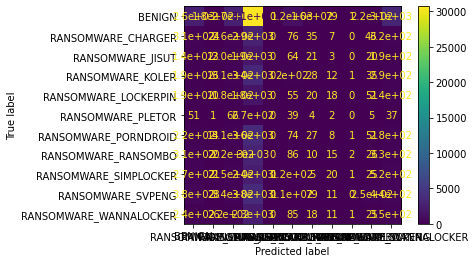

Accuracy: 0.09582746316607196
[[ 3195   200  1643 30731     0  1080   698    59     8   210  3231]
 [  213    15   129  3000     0    64    97     7     1    34   395]
 [  146    19    98  1953     0    43    77     2     2    31   196]
 [  218    15   209  3354     0   185   124     3     0    35   313]
 [   87    11   179  1974     0    56    52     3     1    70    98]
 [   48     1    74   238     0    65    11     1     0     8    25]
 [  240    26   178  3587     0    99   128     6     0    52   292]
 [  317    33   145  2856     0   139    52     9     0    20   415]
 [  226    15   157  2576     0    98    51    15     0    14   482]
 [  432    33   201  3478     0   189   190    21     1    88   783]
 [  246    33   113  2361     0    87    65    15     0    24   326]]


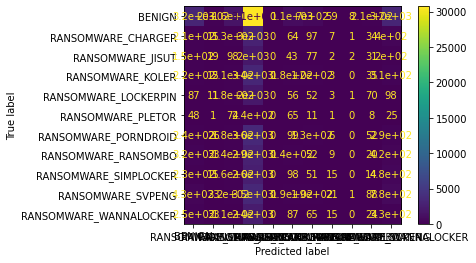

Accuracy: 0.09379978669896905
[[ 2963    92   923 32800     0   926     0   241    52   347  2711]
 [  241     7    91  3235     0    81     0    11     7    24   258]
 [  139     3    70  2087     0    46     0     6     4    22   190]
 [  192    14   106  3582     0   214     0    11     4    54   279]
 [  115     5    50  2030     0    83     0     3     5    52   188]
 [   59     2    17   289     0    79     0     1     2     1    21]
 [  249     8    90  3782     0    52     0    18     9   100   300]
 [  306    10    63  2861     0   127     0    79    12    40   488]
 [  204     5    60  2991     0    78     0    31     9    23   233]
 [  414    17   156  3935     0   155     0    50     8    74   607]
 [  211    10    77  2541     0   111     0    31     7    21   261]]


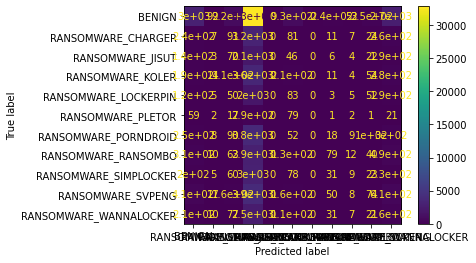

Accuracy: 0.09653846660258858
[[ 3147   124  1431 31241     0  1131   177    76     8   563  3157]
 [  238    13   149  3106     0   117    22     9     0    53   248]
 [  131     5   101  2027     0    69     8     6     0    24   196]
 [  246    18   123  3501     0    91    18     8     2    46   403]
 [  193    10    61  1844     0    54    11     2     1    53   301]
 [   52     2    36   265     0    89     2     2     0     8    16]
 [  219    13   195  3572     0    99    32    12     2    81   383]
 [  295    16   164  2886     0   120    10     9     3    50   433]
 [  264    15   142  2627     0    78     2    13     0    31   462]
 [  331     7   243  3929     0   129    15    15     4    61   682]
 [  184    12    85  2409     0   101    24     6     0    70   379]]


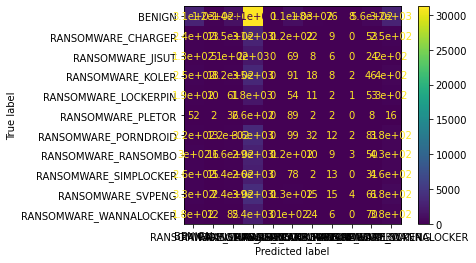

Accuracy: 0.09656480006320031
[[ 3133   181  1232 31047     0   874   639    96    13   209  3631]
 [  226    15   127  3108     0    85    39    12     1    17   325]
 [   92     7   106  2081     0    47    17     1     1    24   191]
 [  146    11   129  3519     0   208    47     5     1    65   325]
 [  119    15    98  2013     0    28    29    10     1    42   175]
 [   81     1    48   231     0    43    21     4     0     2    41]
 [  232    14   118  3656     0    83    16    14     1    34   440]
 [  318    12   107  2980     0    81    22     7     5    17   437]
 [  256    17   107  2673     0    78    11    16     0    16   460]
 [  454    14   181  3693     0   154   141    17     3    77   682]
 [  341    18    65  2300     0    70    29     6     3    20   418]]


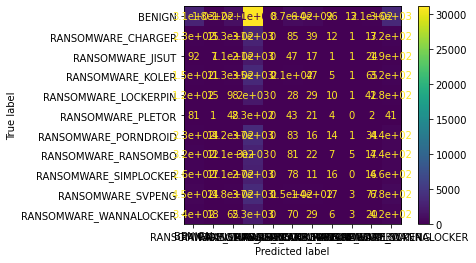

Accuracy: 0.09045543720127981
[[ 2271   158  4949 29837     0  1124   160    61    17   464  2014]
 [  196    16   573  2774     0    89    26    12     2    51   216]
 [  129     9   337  1805     0    65    27     3     2    29   161]
 [  121    13   315  3563     0   127    56     2     1    81   177]
 [  100     9   342  1853     0    44    17     2     2    39   122]
 [   35     0   118   249     0    36     2     2     0     4    26]
 [  250    12   642  3207     0    98    59     7     1    53   279]
 [  296    13   373  2711     0    92    24     3     5    58   411]
 [  216    29   360  2494     0   151    21    13     4    58   288]
 [  235    22   720  3475     0   153    25    13     3   299   471]
 [  198    10   353  2293     0    81    14     5     2    32   282]]


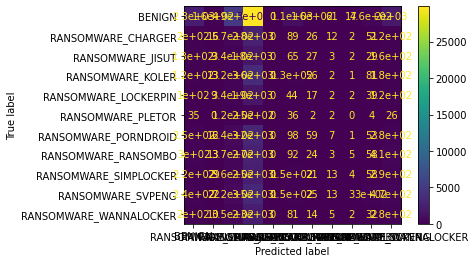

Accuracy: 0.15593358701233723
[[ 7118   115  3161 26063     0   880   938   140     2   758  1880]
 [  725    11   248  2609     0    78    84     8     0    64   128]
 [  313    11   228  1803     0    45    44     2     0    43    78]
 [  265    12   231  3801     0    20    32     5     0    49    40]
 [  544     6   138  1563     0    46    39     4     0    96    95]
 [  108     0    74   187     0    56    14     1     0     3    29]
 [  353    14   238  3752     0    72    38     2     2    50    87]
 [  647    16   298  2576     0    86    40    11     2    65   245]
 [  745     7   243  2191     0    84    60    17     0    36   251]
 [  848    12   447  3199     0   141    63    20     4   302   380]
 [  534    10   213  2047     0    69    39    24     0    56   278]]


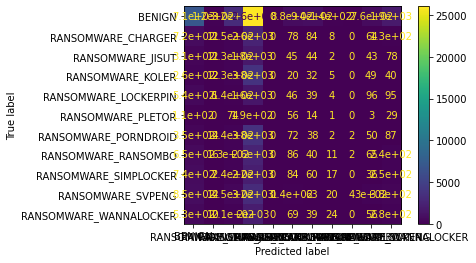

Accuracy: 0.0975654715664459
[[ 3073   111  1015 32528     0   925   538    81    29   331  2424]
 [  246     4   104  3168     0    76    47    15     4    35   256]
 [  125     4    65  2094     0    55    29     4     1    24   166]
 [  208     8   125  3551     0    69    75    10     2   118   289]
 [  117     5    90  2002     0    74    17     6     3    35   182]
 [   37     0    43   337     0    29     5     3     0     1    17]
 [  217     8    90  3829     0   104    41     6     2    38   273]
 [  272     6    84  3037     0   145    27    10     5    27   373]
 [  234    10    72  2866     0    86    21    11     2    15   317]
 [  343    11   122  4009     0   154    40    18     1   303   415]
 [  205    17    97  2463     0    91    22    14     5    24   332]]


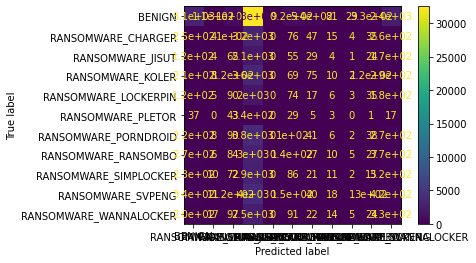

Accuracy: 0.09884264440611464
[[ 3391   119  2115 31469     0   969   146    56     8   673  2108]
 [  244     5   244  3130     0    70    15    14     2    32   200]
 [   89    12   136  2058     0    61     7     1     1    51   151]
 [  195     9   332  3455     0    72    17     4     3   162   206]
 [  178     4   141  2001     0    22     7     4     1    42   131]
 [   47     1    76   236     0    47     5     1     0     5    53]
 [  248     8   328  3519     0   109    23    10     1   170   193]
 [  327    15   169  2882     0   115     8    11     6    51   402]
 [  317    15   128  2589     0   106     9     8     0    52   410]
 [  411    17   338  3831     0   122    47    15     4   101   530]
 [  209    15   171  2369     0    78     6     5     1    78   338]]


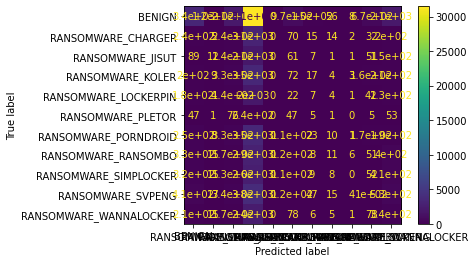

Accuracy: 0.09360228574438109
[[ 2828   168  1820 30958     0   899    93   296  2872   775   345]
 [  239     7   167  3048     0    58    20    27   253    80    56]
 [  104     2    88  2049     0    53    11    19   154    46    42]
 [  184    11   180  3560     0    69    11    11   277   111    41]
 [   81     3   105  2020     0    57     5     7   131    80    42]
 [   36     0    40   315     0    39     0     3    20    11     7]
 [  132    15   200  3660     0    75    22    11   283   186    25]
 [  244    19   175  2819     0    66    16    53   498    55    40]
 [  263    10   123  2614     0    64     7    32   356   137    28]
 [  322    11   304  3950     0   121    25    39   480   108    57]
 [  224    13   139  2296     0    85     6    79   317    63    48]]


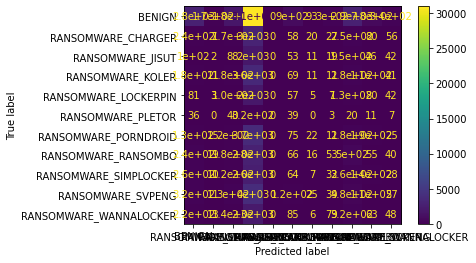

Overall Accuracy: 0.10099658850466957


In [ ]:
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix


    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = GaussianNB()
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

Accuracy: 0.5
[[34471   922   521   907   477    42   956   766   682   742   569]
 [ 2334   455   120   260   141     9   286    80    74   136    60]
 [ 1517   193   154   230    87     6   158    66    44    69    44]
 [ 2834   259   210   383   140     9   282    83    81   115    59]
 [ 1551   181   110   212   105     1   188    50    47    62    24]
 [  151    18    14    19     7   157    12     9     5    71     8]
 [ 2709   348   176   264   158    15   462   122   100   183    71]
 [ 2494   104    60    93    75     7   139   321   330   136   227]
 [ 2189    83    49    78    31     9    70   325   340   174   286]
 [ 3463   140    64   178   116    39   198   109   122   878   109]
 [ 2063    56    58    78    31     3    61   264   263   145   249]]


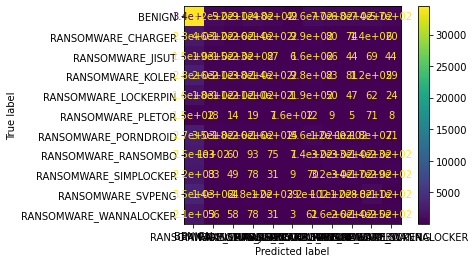

Accuracy: 0.5065767817877787
[[35052   509   340   504   298    35   664  1018   930   870   835]
 [ 2588   289   114   210   129     9   286    88    69   140    33]
 [ 1717   125   134   115    79    15   146    55    54    81    46]
 [ 2920   254   210   347   121     2   265    76    85   132    44]
 [ 1403   169   103   221    91    10   178    67    77   163    49]
 [  153    14     9    11     3   179     6    27    21    28    20]
 [ 2780   354   147   323   163    15   371    99    92   198    66]
 [ 2587   100    48    98    47    10   104   374   256   156   206]
 [ 2216    83    43    84    31     9    94   342   343   156   233]
 [ 3279   151    39   120    95    57   187   176   153  1046   113]
 [ 2171    70    35    59    36     1    82   218   235   115   248]]


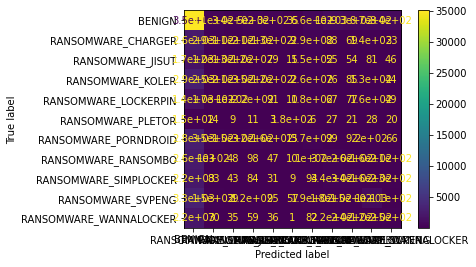

Accuracy: 0.49799207362835585
[[34108   899   464   987   492    70  1093   754   632  1030   526]
 [ 2341   451   143   261   129    16   227    96    76   156    59]
 [ 1576   171   176   157    85    18   151    51    46    96    40]
 [ 2601   318   226   398   146    38   348    84    87   122    88]
 [ 1393   165   143   236   153    11   186    37    43   119    45]
 [  154    12    10     7     5   193    15    18    11    38     8]
 [ 2711   247   101   290   215    13   461   122   110   290    48]
 [ 2311   100    57    97    57    17   109   391   378   199   270]
 [ 2226    85    66    92    58    12   101   311   272   200   211]
 [ 3299   152    89   115    85    30   150   189   210   964   133]
 [ 2188    70    44    66    35    11    73   201   210   117   255]]


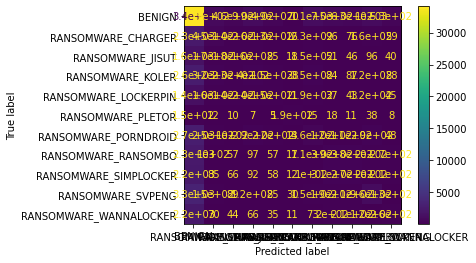

Accuracy: 0.498268574964779
[[34294   850   506   971   476    40  1047   710   686   870   605]
 [ 2144   505   210   239   138    26   269   102    89   164    69]
 [ 1617   171   149   150    80    21   138    63    54    77    47]
 [ 2684   290   207   375   140     5   310   103   112   138    92]
 [ 1584   156    84   161   128     4   200    60    42    84    27]
 [  173     7     7     6    11   175    13    26    22     9    23]
 [ 2837   286   189   304   132    17   383   126   119   136    79]
 [ 2471   103    62    97    49    16    95   387   298   152   256]
 [ 2310    83    59    79    46     2    74   265   328   138   250]
 [ 3314   141    92   149    97    30   207   193   181   865   147]
 [ 2065    51    39    79    45    11    84   206   179   257   254]]


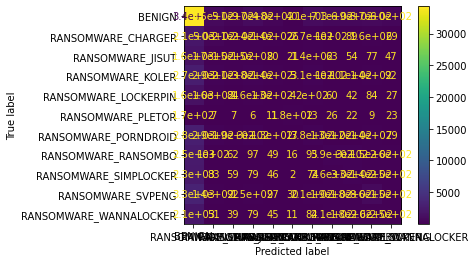

Accuracy: 0.5059842789240148
[[34882   591   350   619   369    77   664   801   691  1461   550]
 [ 2310   486   147   223   140     4   274   108    83   116    64]
 [ 1530   156   177   168   108    10   151    58    81    78    50]
 [ 2561   270   209   463   155    28   282    99    96   205    88]
 [ 1560   137    60   159   112     3   197    64    53   140    45]
 [  130    10    10     6     1   230    20     5     6    51     3]
 [ 3009   297   133   267   162     3   303   117    67   186    64]
 [ 2614   108    41    92    41     8    72   362   267   179   202]
 [ 2305    70    37    59    39    13    91   331   327   147   215]
 [ 3526   178    58   120    65    29   164   182   141   842   111]
 [ 2160    59    26    71    27     4    84   252   190   152   245]]


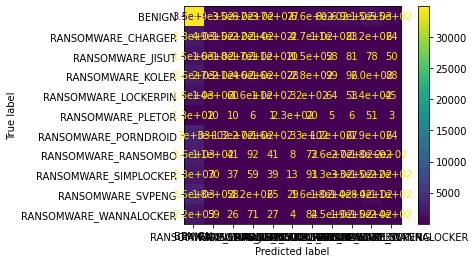

Accuracy: 0.5194933442178303
[[34160   985   610  1158   507    52  1124   651   550   794   464]
 [ 2193   470   162   293   130    28   302   107    73   148    49]
 [ 1538   173   191   193   101     5   142    44    42    76    62]
 [ 1651   166   101  1895   119    11   265    43    51   114    40]
 [ 1499   124   113   206   109     6   170    52    84   128    39]
 [  141    11    13    10     7   177    15    15     5    68    10]
 [ 2804   288   125   286   177    25   460   135    84   154    70]
 [ 2584   104    51    92    46    11    88   355   287   151   217]
 [ 2209    84    47   101    55     9    99   373   286   163   208]
 [ 2972   164   102   216   127    56   170   155   158  1163   133]
 [ 2297    58    42    63    34     0    81   185   197   124   189]]


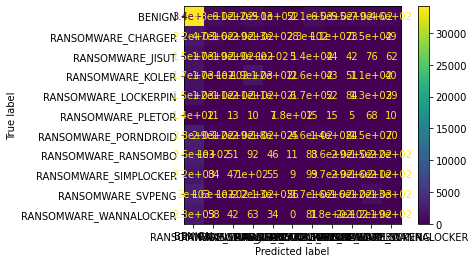

Accuracy: 0.5463929742327088
[[35083   459   296   545   317    65   643   835   704  1493   615]
 [ 2356   463   122   231   114    12   277    97    81   158    44]
 [ 1553   174   155   201    78     6   130    57    64   100    49]
 [ 1430   105    48  2378    91     5   155    43    44   101    55]
 [ 1471   136    48   215   142     8   283    45    48   111    24]
 [  139    10    10    13    17   189    13    11     2    64     4]
 [ 1671   198   130  1397    92    22   866    51    43    86    52]
 [ 2430   111    38    85    50     9   157   433   248   213   212]
 [ 2156    75    50    70    55     7   121   377   356   172   195]
 [ 3024   137    55   202   120    17   304   135   156  1165   101]
 [ 1969    64    44    71    46    15    63   325   262   143   268]]


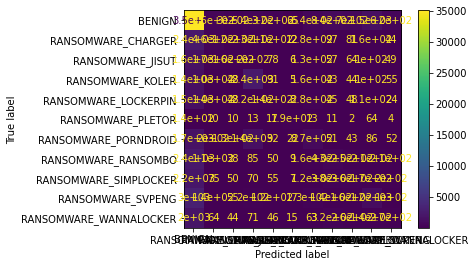

Accuracy: 0.5266033785829964
[[34409   849   522   944   478    67   993   599   534  1140   520]
 [ 2371   461   134   224   123    19   249    64    68   168    74]
 [ 1556   163   145   215    98    13   168    46    28    92    43]
 [ 2537   211    86   735   135    13   386    75    62   183    32]
 [ 1449   185   128   197   128    13   169    51    49   119    43]
 [  147    19     5     8     7   173    22    14     4    71     2]
 [ 2324   244   135   258   126    20  1165    85    60   134    57]
 [ 2529    91    47    63    56    15   122   386   279   185   213]
 [ 2098   109    50    91    65    12   109   352   393   150   205]
 [ 2748   111    57   125    85    45   186   116    93  1753    97]
 [ 2029    76    46    86    32     4    66   268   276   140   247]]


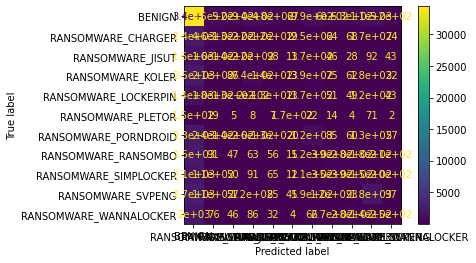

Accuracy: 0.5159646604958591
[[34769   660   371   640   396    58   751   819   674  1283   633]
 [ 2336   465   158   218   122     4   264   112    70   143    64]
 [ 1543   155   138   216    82    12   153    57    64    98    49]
 [ 2597   248   133   523   182     8   275    83    89   253    64]
 [ 1513   198    90   116   107     1   236    72    46   116    36]
 [  156    14    12    12     5   165    15     9     7    72     4]
 [ 2807   253    98   276   172    19   438   108    99   271    68]
 [ 2465    89    44    62    62    14   141   425   264   207   213]
 [ 2153    80    44    62    48    12    76   363   370   142   284]
 [ 2927   123    80   134    75    66   128   164   149  1478    92]
 [ 1956    61    59    93    42    18    69   295   247   121   309]]


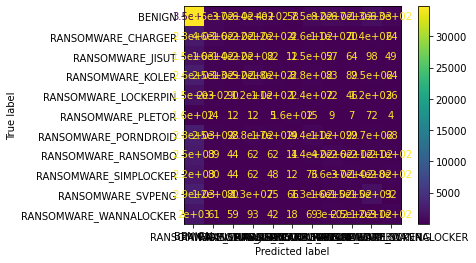

Accuracy: 0.48989453449025006
[[33750   775   524   804   484   172   842   729   633  1781   560]
 [ 2106   485   152   263   145    18   371   121    81   162    51]
 [ 1448   208   157   217   101    12   150    75    59    91    50]
 [ 2463   293   165   486   231     9   322   103    90   220    73]
 [ 1493   177   100   179   132     9   158    52    61   121    49]
 [  168    15     8    11    13   136    34    14     7    60     5]
 [ 2710   262   149   382   218    14   365    99    69   271    70]
 [ 2332    88    62    76    50     7   119   371   444   182   254]
 [ 2187    92    40   124    73    12   165   184   217   395   145]
 [ 3327   158    91   121    91    55   235   224   145   845   125]
 [ 1959    78    56    75    44     7    71   281   304   132   263]]


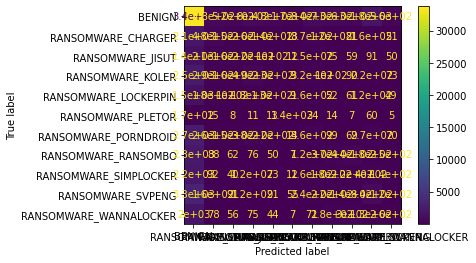

Overall Accuracy: 0.5107170460216118


In [ ]:
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())


Accuracy: 0.5095720868992758
[[36702   724   380   665   232    28   628   496   378   579   243]
 [ 2824   356    86   209    77     6   166    65    58    82    26]
 [ 1921   147    84   139    51     1    85    43    36    45    16]
 [ 3387   205   112   270    92     7   162    57    44    93    26]
 [ 1842   140    64   141    48     4   117    55    35    71    14]
 [  259    16     6    17     6   122     4    10     7    22     2]
 [ 3317   303   136   189    73    10   286    82    58   115    39]
 [ 3039    93    37    83    48     8   102   200   179   104    93]
 [ 2731    73    42    70    24    10    53   190   198   119   124]
 [ 4058   132    62   364    67    23   145    95    83   347    40]
 [ 2519    68    33    60    22     4    63   161   151   101    89]]


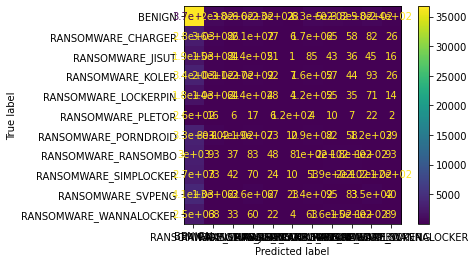

Accuracy: 0.5115011389221714
[[37143   404   220   347   159    33   422   702   485   719   421]
 [ 3043   187    96   158    64     8   157    64    44   105    29]
 [ 1981    96    56   102    46    11    96    55    34    68    22]
 [ 3475   209   127   221    67     3   126    65    61    74    28]
 [ 1841   116    74   127    43    16   107    40    54    96    17]
 [  275    14     6     6     2   112     5    17     8    13    13]
 [ 3506   236    88   158    90    19   199    82    61   138    31]
 [ 3088    82    40    74    24     2    90   198   152   137    99]
 [ 2733    81    37    55    30     4    54   213   182   129   116]
 [ 4140   152    52   108    61    20   135   143   116   435    54]
 [ 2641    59    27    48    23     2    69   132   100    97    72]]


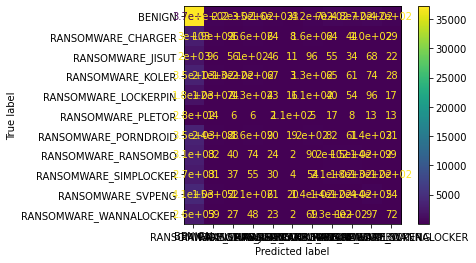

Accuracy: 0.5065241148665552
[[36497   727   346   716   292    29   701   443   345   690   269]
 [ 2931   321    95   153    75    20   137    51    49    94    29]
 [ 1962    98    66   105    56    10   113    45    33    60    19]
 [ 3308   188   161   268    70    32   188    56    48    93    44]
 [ 1848   143    92   127    48     7   111    42    27    72    14]
 [  258    10    13     4     5   130     5    18     6    17     5]
 [ 3313   213    82   201   110     5   276    97    81   190    40]
 [ 2920    99    39    73    51     6    86   274   165   152   121]
 [ 2732   108    39    90    53     1    72   162   127   134   116]
 [ 4227   165    63    94    57    14    98   107   142   387    62]
 [ 2681    84    20    47    15     4    46   119   103    75    76]]


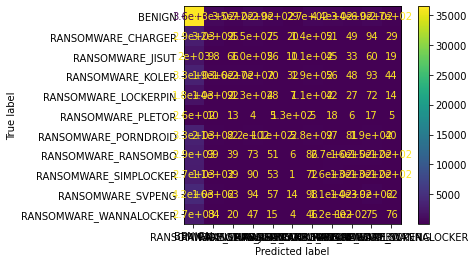

Accuracy: 0.5084201240305994
[[36632   639   347   706   255    25   623   519   409   602   298]
 [ 2862   349    91   141    52    15   141    67    59   141    37]
 [ 1992   122    51   111    54    18    92    37    29    39    22]
 [ 3382   198   120   219    99     5   196    68    51    79    39]
 [ 1884   116    64   124    67     1   125    39    30    65    15]
 [  256    17     7     7     6   121     6    18    12    12    10]
 [ 3547   227    96   149    96     9   223    67    60    95    39]
 [ 3062    95    36    72    43     4    94   232   140   104   104]
 [ 2803    78    34    61    22     3    63   187   191    88   104]
 [ 4090   132    72   115    79    18   126   168   122   415    79]
 [ 2576    62    33    65    33     3    58    96   120   110   114]]


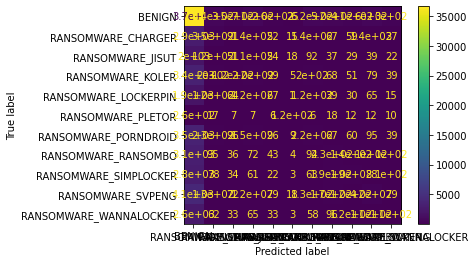

Accuracy: 0.5158066597321888
[[37114   482   197   555   178    35   429   439   404   921   301]
 [ 2797   371    87   157    91     7   175    82    58    97    33]
 [ 1961   105    78   102    41     3    96    58    38    65    20]
 [ 3329   172   102   283    96    16   139    78    70   138    33]
 [ 1899   105    47    86    60     3   119    54    51    89    17]
 [  214    11     5     2     2   169     5    13     6    43     2]
 [ 3644   207    81   161    74     6   169    72    69    95    30]
 [ 3157    82    36    51    21     7    46   214   156   142    74]
 [ 2813    53    25    74    32     4    60   207   182   103    81]
 [ 4173   143    59   119    52     7   130   130   100   449    54]
 [ 2519    65    50    84    20     1    81   138   120   106    86]]


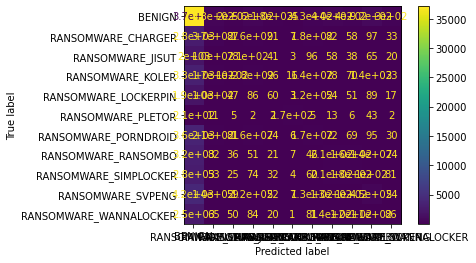

Accuracy: 0.5184400057933614
[[36389   805   405   884   289    40   682   415   317   587   242]
 [ 2852   317    92   195    66    18   173    70    50    90    32]
 [ 1905   130    95   122    58     7    93    42    38    56    21]
 [ 2274   122    62  1144    51     5   628    35    34    91    10]
 [ 1938   116    59   130    40     3    87    32    22    80    23]
 [  237    18    10     8     6   140     6     5     5    36     1]
 [ 3448   227    94   176    89    24   288    89    45   100    28]
 [ 3149    82    37    78    38     5    52   213   151    94    87]
 [ 2733   103    41   109    39     4    96   205   139   102    63]
 [ 3995   141    66   167    69    17   128   143    93   542    55]
 [ 2702    48    24    39    25     1    59   134    91    79    68]]


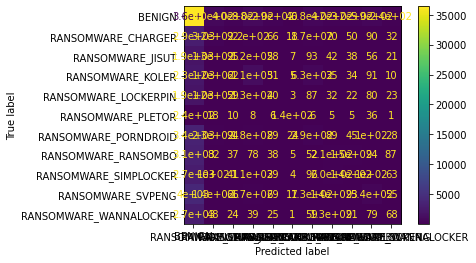

Accuracy: 0.546076972705368
[[37309   384   165   439   125    37   485   512   385   903   311]
 [ 2862   359   100   159    57     3   186    57    52    85    35]
 [ 1922   129    61   133    65     3    80    36    44    75    19]
 [ 1952    91    31  2069    42     1    84    40    24    86    35]
 [ 1836    95    68   133    88     1   112    46    41    88    23]
 [  232    13     8    12     6   136     7     6     4    46     2]
 [ 2362   150   103  1353    49    21   395    39    32    84    20]
 [ 2981   106    45    87    37     5   123   232   156   142    72]
 [ 2644    89    36    70    44     3    91   219   193   139   106]
 [ 3957   168    59   158    69    12   178   143   104   513    55]
 [ 2465    81    32    61    19     3    45   190   151   104   119]]


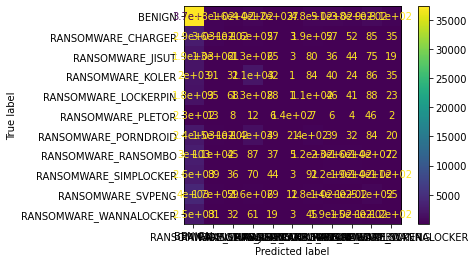

Accuracy: 0.5267877128072785
[[36720   650   314   726   271    28   624   413   298   755   256]
 [ 2940   328    83   123    57     8   161    53    54   123    25]
 [ 1975   126    60   112    43    17    85    39    28    64    18]
 [ 3090   182    79   581    71     7   177    42    39   150    37]
 [ 1896   116    87   139    50    14    72    32    37    70    18]
 [  252     7     7     5     1   146     6     9     3    34     2]
 [ 3304   223    91   176    64    11   473    75    57   104    30]
 [ 3107    92    39    58    26    12    94   197   135   135    91]
 [ 2656    82    41    63    38     8    74   256   207   127    82]
 [ 3574   121    63    96    55    28   117    89    89  1131    53]
 [ 2514    63    36    63    19     1    45   161   160    92   116]]


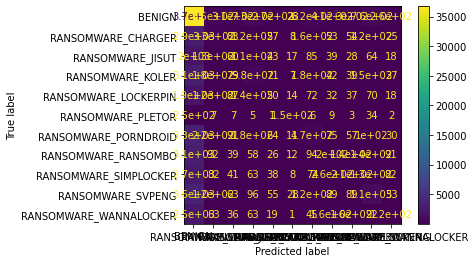

Accuracy: 0.5206520164847463
[[37096   478   242   500   197    19   482   515   382   845   298]
 [ 2902   336   104   138    55     4   156    77    55   105    24]
 [ 1991   108    63    93    44     2    84    40    42    75    25]
 [ 3387   217    93   228    82     6   163    44    58   142    35]
 [ 1834   137    44   103    60     2   147    56    36    92    20]
 [  251    14     8    10     5   123     5     2     4    46     3]
 [ 3509   171    90   184    79    11   218    85    68   163    31]
 [ 3063    68    41    56    50     6    97   252   139   137    77]
 [ 2794    82    26    54    25     3    50   203   180   104   113]
 [ 3797   112    56   102    47    36    92   127   120   875    52]
 [ 2496    73    32    82    27     6    43   176   116   107   112]]


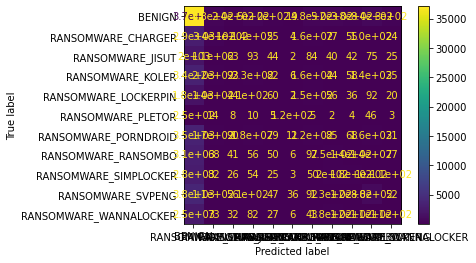

Accuracy: 0.5028769305718311
[[36293   570   309   600   219    93   549   543   426  1173   279]
 [ 2791   348    79   165    96     6   180    71    66   122    31]
 [ 1901   138    77   146    50     7    78    49    45    65    12]
 [ 3204   231   105   264   121     3   169    97    59   161    41]
 [ 1986   112    60   105    38     3    69    37    29    78    14]
 [  297    11     1    12     4    86    17     5     5    30     3]
 [ 3521   210    83   202   100     4   188    68    30   164    39]
 [ 2982    83    36    90    35     9    72   211   262   120    85]
 [ 2721    88    28    91    45     4    98   134   164   180    81]
 [ 4167   127    59   109    61    21   163   147    80   419    64]
 [ 2574    64    30    56    19     7    53   152   135    75   105]]


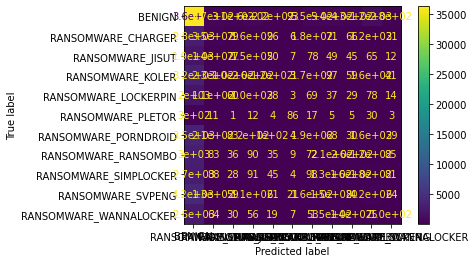

Overall Accuracy: 0.5166657669412804


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

Accuracy: 0.3999473337722186
[[26149  1848  1331  1799  1161    84  2027  1800  1573  1746  1537]
 [ 1558   561   187   387   238     9   403   181   128   188   115]
 [  956   276   186   295   156     6   252   115    90   140    96]
 [ 1925   402   301   480   242    15   382   183   161   234   130]
 [  984   277   153   288   162     4   265   101   104   131    62]
 [  112    30    22    19    13   148    29    13     7    67    11]
 [ 1767   454   258   409   282    15   606   196   162   302   157]
 [ 1678   214   104   162   147     9   182   463   453   250   324]
 [ 1533   154    90   134    78    17   148   442   387   247   404]
 [ 2295   241   153   281   232    53   337   238   247   935   404]
 [ 1436   113    97   124    83    11   121   341   372   274   299]]


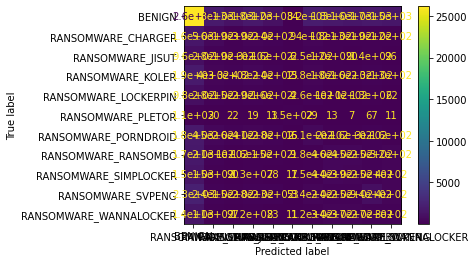

Accuracy: 0.4093404784789793
[[26906  1235   864  1183   729   102  1466  2307  2122  2149  1992]
 [ 1686   393   213   343   229    13   412   164   127   239   136]
 [ 1141   199   202   208   136    29   197   130    82   143   100]
 [ 1917   406   328   451   243     5   442   147   168   221   128]
 [  967   256   164   263   159    10   223    87    98   228    76]
 [  112    23    23    18    11   160    10    28    22    34    30]
 [ 1837   460   264   440   278    25   464   198   194   297   151]
 [ 1820   171   117   170    98    14   193   429   374   300   300]
 [ 1422   168    87   142   104    19   188   494   428   251   331]
 [ 2222   231   138   240   176    74   276   364   364  1101   230]
 [ 1471   141    80   117    75     9   131   320   320   210   396]]


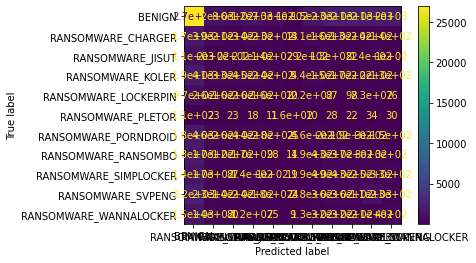

Accuracy: 0.3982935917523601
[[25595  1944  1178  1959  1231   138  2265  1642  1583  2154  1366]
 [ 1543   529   227   368   227    24   360   155   149   245   128]
 [ 1065   232   242   199   150    19   229   110    83   162    76]
 [ 1702   432   338   510   251    47   469   174   156   237   140]
 [  937   233   153   286   200    22   273    86    92   159    90]
 [  120    25    16    16    11   163    19    26    19    39    17]
 [ 1839   384   186   382   314    18   542   187   207   428   121]
 [ 1527   148   111   158   120    16   177   516   484   349   380]
 [ 1558   172    99   146    92    12   175   377   416   271   316]
 [ 2258   244   157   227   148    48   212   347   340  1123   312]
 [ 1546   108   103   106    78    15   136   279   262   223   414]]


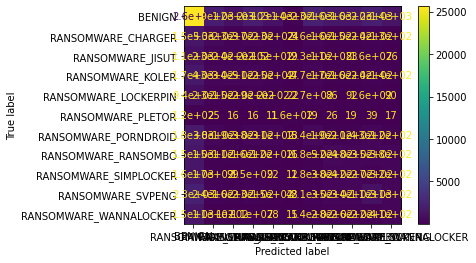

Accuracy: 0.4002686012982396
[[26132  1735  1245  1948  1153    77  2024  1787  1561  1856  1537]
 [ 1484   572   243   343   199    33   387   161   175   240   118]
 [ 1070   244   223   223   143    23   243   107    74   120    97]
 [ 1714   446   353   459   305     7   448   174   189   196   165]
 [ 1038   202   159   265   193     6   234   105    80   150    98]
 [   99    17    16    12    14   164    18    34    37    24    37]
 [ 1909   427   328   382   307    16   451   208   178   246   156]
 [ 1663   182   126   134    95    22   212   472   416   278   386]
 [ 1641   162    73   139    83    10   155   391   387   260   333]
 [ 2308   272   184   273   176    48   254   335   322   951   293]
 [ 1448   109    96   135    95    12   147   251   285   296   396]]


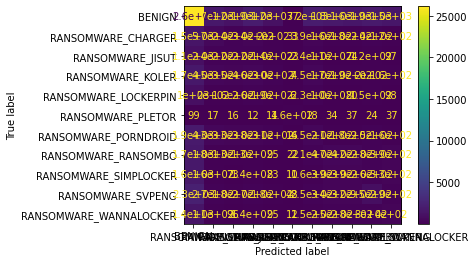

Accuracy: 0.4145281702194894
[[27166  1381   929  1455   947   137  1538  1814  1673  2549  1466]
 [ 1516   546   262   313   236    11   390   212   161   189   119]
 [ 1069   230   226   235   149    12   208   111   101   127    99]
 [ 1725   387   292   569   248    29   373   203   154   325   151]
 [ 1018   194   113   225   185    10   276   135    84   207    83]
 [   95    24    12    13     6   216    23     8     9    61     5]
 [ 2003   435   261   396   252    18   449   220   165   255   154]
 [ 1888   134   143   162    78    10   120   498   338   315   300]
 [ 1611   143    93   138   112    17   130   413   373   238   366]
 [ 2445   302   134   222   135    48   259   354   285   949   283]
 [ 1431   112    61   128    47     9   161   365   344   306   306]]


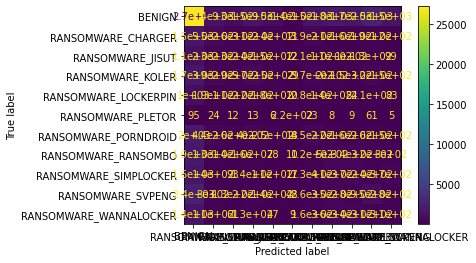

Accuracy: 0.4186493568052246
[[25660  2062  1390  2176  1313   114  2268  1614  1337  1782  1339]
 [ 1412   558   254   378   238    35   403   179   160   227   111]
 [  959   223   286   265   162     9   257    89    75   150    92]
 [ 1117   244   162  1931   202    13   329    84    92   214    68]
 [ 1011   218   146   247   191     5   250    83   106   167   106]
 [  101    28    18    18    15   158    29    11    12    70    12]
 [ 1861   375   247   419   286    33   601   215   175   239   157]
 [ 1789   191    95   141    70    19   182   481   374   294   350]
 [ 1495   160    87   159   112    50   163   425   403   286   294]
 [ 2097   259   163   266   203    65   287   276   294  1251   255]
 [ 1615   102    92   113    78    12   138   311   291   242   276]]


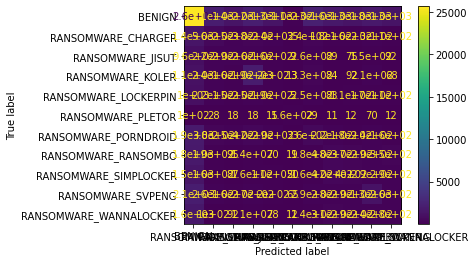

Accuracy: 0.45227718600639905
[[27462  1152   708  1210   828   142  1438  1910  1618  2999  1588]
 [ 1556   589   236   330   219    17   401   136   156   214   101]
 [ 1026   226   242   246   169    13   252    71   100   140    82]
 [ 1038   175   110  2298   111    12   224    97    92   199    99]
 [  959   191   107   265   253     7   316    83    92   176    82]
 [   89    13    23    17    21   180    25    18    16    66     4]
 [ 1172   279   200   657   145    26   887   132    91   912   107]
 [ 1690   152    91   161   126    14   226   500   357   334   335]
 [ 1477   162    74   132    87    16   179   424   451   320   312]
 [ 2119   269   134   292   207    33   407   292   292  1129   242]
 [ 1333   113    76   113    65    26   140   376   412   257   359]]


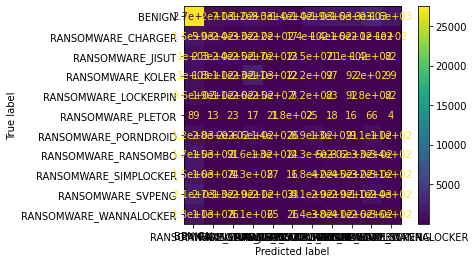

Accuracy: 0.43005174525010204
[[26210  1910  1259  1929  1213   127  2027  1492  1364  2227  1297]
 [ 1483   587   224   330   223    30   388   144   151   275   120]
 [ 1033   201   250   294   146    28   222    89    77   142    85]
 [ 1669   377   174   870   273    17   454   133   114   260   114]
 [  938   225   199   269   197    27   224   107    70   177    98]
 [  128    18    13    14    11   178    21    11    12    59     7]
 [ 1692   336   177   328   183    29  1198   178   110   253   124]
 [ 1682   184    89   148   106    23   208   514   397   312   323]
 [ 1478   149    88   143    83    15   173   434   492   245   334]
 [ 1887   225   125   236   174    71   274   205   206  1797   216]
 [ 1348   122    91   123    80    16   106   385   375   255   369]]


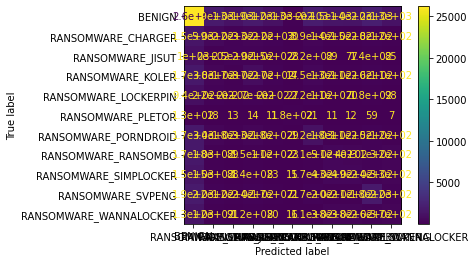

Accuracy: 0.42408721642154606
[[26884  1460   999  1429   980   123  1546  1805  1650  2492  1686]
 [ 1541   551   265   320   212    14   380   180   159   211   123]
 [ 1007   246   181   253   147    25   257   117   104   139    91]
 [ 1666   370   224   662   286    16   412   188   177   324   130]
 [  982   236   131   179   216     5   314   110   110   161    87]
 [  113    19    27    20    10   164    20    10    14    64    10]
 [ 1870   367   195   400   285    21   559   202   175   357   178]
 [ 1683   161    80   132   112    27   191   556   359   342   343]
 [ 1472   122    99    95    92    15   147   452   477   246   417]
 [ 2065   198   133   218   140    93   243   276   281  1522   247]
 [ 1303   122   103   107   118    23   159   388   297   213   437]]


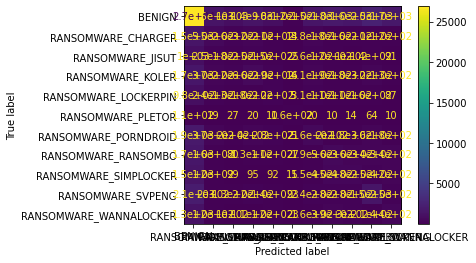

Accuracy: 0.39339556807857906
[[25562  1594  1179  1715  1078   308  1931  1733  1465  2971  1518]
 [ 1438   530   209   365   234    26   450   203   155   224   121]
 [  968   266   206   285   178    20   247    92    85   149    72]
 [ 1651   406   286   575   309    13   452   187   168   272   136]
 [  995   232   164   220   221    17   216   105   104   164    93]
 [  109    14    11    24    18   123    41    24    11    73    23]
 [ 1839   402   242   440   345    21   516   159   137   367   141]
 [ 1575   172   121   126   106    16   174   536   501   285   373]
 [ 1570   184    90   185   131    19   250   274   279   425   227]
 [ 2329   250   165   228   159    88   359   327   288   948   276]
 [ 1386   137    93   119    90     8   104   394   333   224   382]]


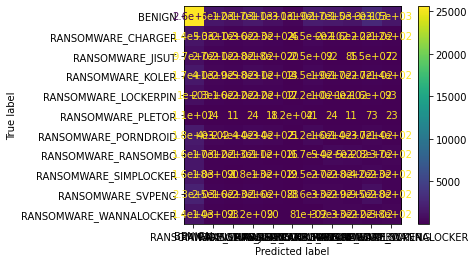

Overall Accuracy: 0.41408390619507013


In [ ]:
from sklearn.tree import DecisionTreeClassifier
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = DecisionTreeClassifier(random_state=0)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())




In [ ]:
# Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
# feature extraction
test = SelectFpr(score_func=f_classif, alpha=0.05)
fit = test.fit(X1, y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
dictt = []
i=0
for col in X1.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        dictt.append([col, score])    
    
#dictt = sorted(dictt, key=operator.itemgetter(1), reverse=True)
dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

outstr = ''

i=1
for col, score in dictt[:15]:
    #if not math.isnan(float(score)):
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1
    
    outstr += '\'' + col + '\', '

print(outstr)


1	Active Max	792.1052865545622
2	Active Std	656.7384388577657
3	Destination Port	635.6546605339962
4	Active Mean	541.8327646052101
5	act_data_pkt_fwd	516.1680732041369
6	Total Length of Fwd Packets	445.09634525826687
7	Subflow Fwd Bytes	445.09634525826687
8	Source Port	404.49482594110106
9	URG Flag Count	363.17152802228475
10	Flow IAT Mean	318.7507603887172
11	Fwd IAT Total	298.99604997958573
12	Flow Packets/s	296.46381551935525
13	Active Min	292.43479671462313
14	Fwd Packets/s	287.6992696566274
15	Fwd IAT Max	273.1732798557981
'Active Max', 'Active Std', 'Destination Port', 'Active Mean', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Source Port', 'URG Flag Count', 'Flow IAT Mean', 'Fwd IAT Total', 'Flow Packets/s', 'Active Min', 'Fwd Packets/s', 'Fwd IAT Max', 


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [33 34 35 47 51 52 58 59 60 61 62 63] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
cols_to_keep = ['Active Max', 'Active Std', 'Destination Port', 'Active Mean', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Source Port', 'URG Flag Count', 'Flow IAT Mean', 'Fwd IAT Total', 'Flow Packets/s', 'Active Min', 'Fwd Packets/s', 'Fwd IAT Max', 
                    'Label']
print('Dropping unnecessary columns...')
df1.drop(columns=[col for col in df1.columns if col not in cols_to_keep], inplace=True, errors='raise') 
df1.dropna(inplace=True)

Dropping unnecessary columns...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759491 entries, 0 to 759490
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  759491 non-null  int64  
 1   Destination Port             759491 non-null  int64  
 2   Total Length of Fwd Packets  759491 non-null  int64  
 3   Flow Packets/s               759491 non-null  float64
 4   Flow IAT Mean                759491 non-null  float64
 5   Fwd IAT Total                759491 non-null  int64  
 6   Fwd IAT Max                  759491 non-null  int64  
 7   Fwd Packets/s                759491 non-null  float64
 8   URG Flag Count               759491 non-null  int64  
 9   Subflow Fwd Bytes            759491 non-null  int64  
 10  act_data_pkt_fwd             759491 non-null  int64  
 11  Active Mean                  759491 non-null  float64
 12  Active Std                   759491 non-null  float64
 13 

Accuracy: 0.5475444371296906
[[36494   656   361   682   321    10   654   577   427   469   404]
 [ 1954   570   158   373   164    13   341    79   103   150    50]
 [ 1159   254   275   344   132     5   174    54    53    68    50]
 [ 2301   352   316   530   213    13   347    84    84   145    70]
 [ 1324   229   137   305    99     2   233    51    51    74    26]
 [   84    19    19    28    11   183    18     9    10    79    11]
 [ 2101   473   265   372   223    12   638   144    96   205    79]
 [ 2005   106    57    59    50    17   145   546   502   168   331]
 [ 1673    80    67    82    47    12    62   527   464   207   413]
 [ 2783   154    95   193   154    48   214   132   134  1330   179]
 [ 1577    56    64    76    43    11    87   360   377   163   457]]


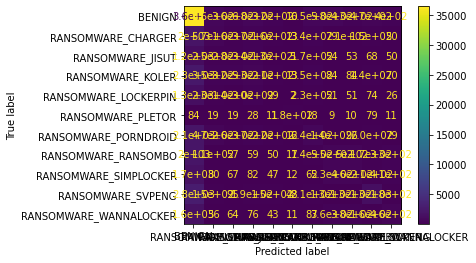

Accuracy: 0.5548855152799905
[[37264   243   154   302   142    15   353   715   667   595   605]
 [ 2179   386   164   322   166     8   350    94    70   163    53]
 [ 1344   189   200   217   107    18   221    71    61    86    53]
 [ 2398   372   344   490   184     3   302    68   123    98    74]
 [  974   239   185   314   121    18   255    84    80   199    62]
 [   88    16    11    14     5   225     4    30    19    31    28]
 [ 2233   502   199   412   225    20   501   141    98   203    74]
 [ 2023   124    59    79    55    12   145   583   406   210   290]
 [ 1718    85    57    97    48     5    83   545   475   182   339]
 [ 2642   153    82   143    94    69   168   231   189  1479   166]
 [ 1830    67    39    52    40     4   111   290   285   133   419]]


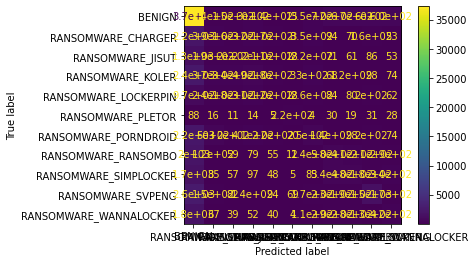

Accuracy: 0.547433145926872
[[36057   643   361   757   381    37   849   503   406   755   306]
 [ 1846   573   177   379   193    18   318   109    93   176    73]
 [ 1228   229   299   202   136    19   202    51    43   106    52]
 [ 1943   398   355   532   199    54   453   104    99   201   118]
 [ 1050   262   200   277   193    19   250    38    50   135    57]
 [   88     9    10    13     9   218     9    31    15    51    18]
 [ 2221   351   132   407   234     7   619   138   104   344    51]
 [ 1761   125    73    93    60    13   100   610   572   223   356]
 [ 1719   112    82   105    68    12   109   453   428   243   303]
 [ 2464   200   107   140    94    32   138   218   252  1602   169]
 [ 1745    73    59    90    47    11    65   322   267   145   446]]


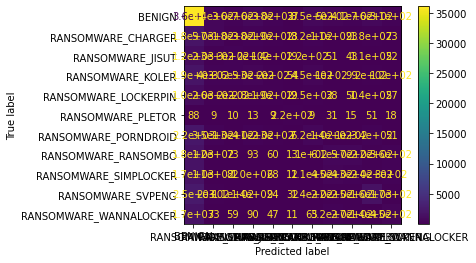

Accuracy: 0.5496056564273394
[[36659   569   327   693   280    13   711   494   449   495   365]
 [ 1600   651   267   352   170    34   352   109   113   218    89]
 [ 1286   231   220   229   127    18   180    55    62   100    59]
 [ 2173   360   325   560   211     9   366   114   106   136    96]
 [ 1325   214   108   253   166     8   239    57    42    85    33]
 [   85    17    16     8    10   203    17    43    26    19    28]
 [ 2241   435   293   409   172    22   526   137   117   161    95]
 [ 1913   127    76    94    46    19   101   609   480   205   316]
 [ 1821    87    63    86    54     9    92   393   481   176   372]
 [ 2637   171   103   180   137    40   196   280   255  1255   162]
 [ 1692    73    63    78    54    13    77   286   235   287   412]]


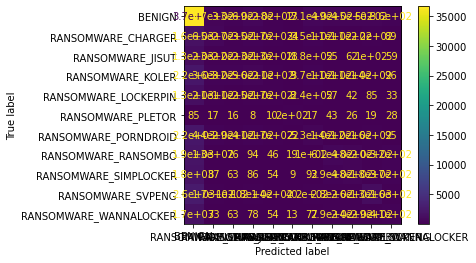

Accuracy: 0.5552673504588606
[[37186   341   226   429   193    33   470   486   428   921   342]
 [ 1806   624   221   296   191     4   368   129    98   155    63]
 [ 1095   216   286   257   163    10   224    78    77    84    77]
 [ 1980   371   318   595   226    24   387   138   101   210   106]
 [ 1180   198   117   209   179     5   293    69    69   160    51]
 [   60    12    10     7     6   279    18     2     4    70     4]
 [ 2422   508   183   363   177    11   459   140    99   176    70]
 [ 2173   131    55    84    45    12    89   529   373   227   268]
 [ 1852    88    49    87    44    17    76   481   415   190   335]
 [ 2907   228    84   123    77    41   190   187   189  1247   143]
 [ 1931    43    31    63    27     4    78   340   229   151   373]]


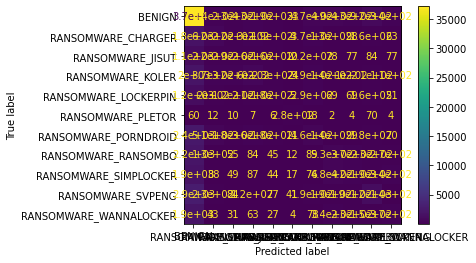

Accuracy: 0.5695927530316397
[[36314   660   434   847   337    21   840   418   376   493   315]
 [ 1652   617   227   401   167    25   392   113   100   199    62]
 [ 1200   230   238   281   135     8   215    58    52    91    59]
 [ 1342   213   140  2048   156    13   304    33    39   120    48]
 [ 1157   216   156   285   154    12   223    70    63   142    52]
 [   65    19    14    11     4   223    34    11     7    74    10]
 [ 2316   383   188   320   213    42   650   177    82   167    70]
 [ 2020   119    65   114    58    16    96   569   417   182   330]
 [ 1819   107    53    93    58     8    82   530   418   181   285]
 [ 2165   195   118   213   115    71   219   219   220  1737   144]
 [ 1884    92    45    62    46     3    95   309   281   161   292]]


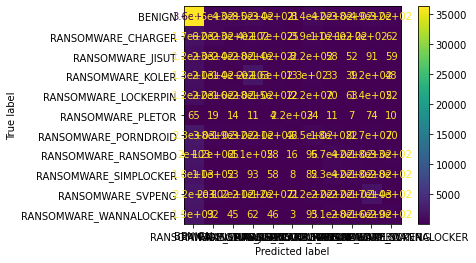

Accuracy: 0.6024700786053799
[[37574   248   143   275   145    21   385   539   408   924   393]
 [ 1903   595   173   319   178    13   380   112    75   153    54]
 [ 1155   254   238   267   156    13   188    69    54   108    65]
 [ 1152   127    64  2598    77     1   178    36    50   121    51]
 [ 1204   172   102   284   157     9   350    38    55   121    39]
 [   75    10    15    14    21   216    17     6     6    92     0]
 [ 1181   249   176  1487   132    33  1115    60    32   104    39]
 [ 1982   106    47    80    48    18   166   676   380   208   275]
 [ 1736   109    42    74    52     9   107   562   518   197   228]
 [ 2384   168    65   208   143    16   308   193   178  1606   147]
 [ 1426    59    57    78    44    11    63   486   410   172   464]]


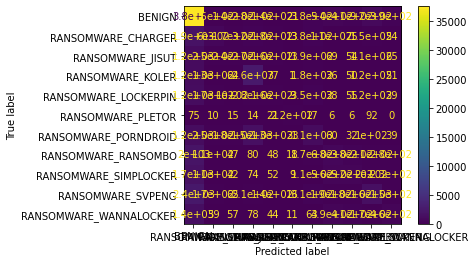

Accuracy: 0.5794414673004253
[[36556   641   380   684   299    21   703   362   322   756   331]
 [ 1851   625   185   267   157    19   354    99    87   224    87]
 [ 1164   236   245   288   147    22   214    38    54   101    58]
 [ 2129   295   129   845   180    13   487    69    63   197    48]
 [ 1066   253   190   262   186    21   205    75    68   146    59]
 [   73    25    15    12     7   227    18    12    10    69     4]
 [ 1866   297   161   284   149    26  1530    80    46   115    54]
 [ 2020    99    54    83    60    15   133   637   368   213   304]
 [ 1592   100    58   109    52    13    96   576   543   210   285]
 [ 2211   113    76   130    77    65   193   145   134  2173    99]
 [ 1527    67    62    87    39     9    78   401   415   144   441]]


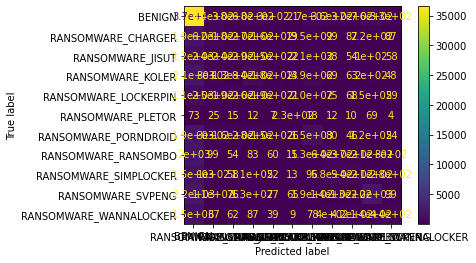

Accuracy: 0.5681312459676888
[[37001   459   253   414   236    18   526   502   440   837   368]
 [ 1860   578   218   302   164    11   359   136    80   172    76]
 [ 1221   184   213   312   124    15   209    73    62    94    60]
 [ 2090   363   190   691   237    12   369    85   105   238    75]
 [ 1265   232   107   168   142     3   332    61    53   123    45]
 [   92    12    17    23    15   208    17     6     5    72     4]
 [ 2238   351   160   362   241    34   657   116   112   253    85]
 [ 2004   121    45    66    46    17   147   658   378   240   264]
 [ 1652    88    61    77    46    13    88   563   476   180   390]
 [ 2274   147    92   133    77    76   127   181   180  2016   113]
 [ 1403    68    66   114    46    21    68   423   386   166   509]]


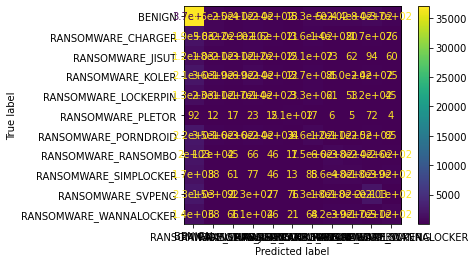

Accuracy: 0.5422849543772795
[[36061   518   329   514   309   170   526   501   431  1315   380]
 [ 1663   592   201   331   162    27   504   126   103   189    57]
 [ 1104   279   261   312   125     9   176    71    82    99    50]
 [ 1965   404   224   619   251    12   443   122   114   222    79]
 [ 1095   296   140   252   181    10   204    75    74   150    54]
 [   77    17    17    14    11   181    52    13     4    77     8]
 [ 2251   342   208   433   287    19   559   117    74   247    72]
 [ 1752    97    59    97    49    14   131   571   626   220   369]
 [ 1770   102    51    97    61    24   209   256   347   497   220]
 [ 2579   187    92   128   107    55   314   273   183  1373   126]
 [ 1458    93    63    89    55     6    68   392   428   177   441]]


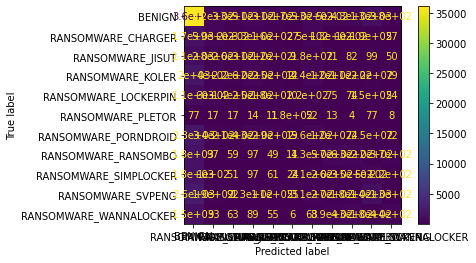

Overall Accuracy: 0.5616656418575072


In [ ]:
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X1, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X1.loc[train_index], X1.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

Accuracy: 0.5162870309414088
[[36777   728   383   686   228    28   644   455   389   491   246]
 [ 2674   406   109   241    93     4   188    60    60    91    29]
 [ 1853   186   106   145    50     3    99    36    26    43    21]
 [ 3243   254   143   299    93    10   199    65    47    76    26]
 [ 1754   157    81   157    60     3   123    46    42    93    15]
 [  235    14     9    15     9   125     9    12     7    36     0]
 [ 3166   296   160   209   100    13   340    99    65   127    33]
 [ 2906    98    45    87    62     4   133   239   211   108    93]
 [ 2602    93    43    79    23    12    44   224   239   140   135]
 [ 4036   147    83   148    89    26   125   116    96   486    64]
 [ 2432    54    40    59    23     6    64   185   155   118   135]]


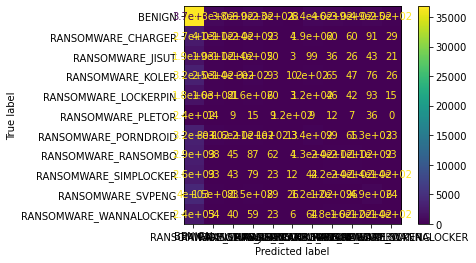

Accuracy: 0.518374172141832
[[37334   376   173   341   165    32   394   703   518   625   394]
 [ 2974   238   108   170    71     7   167    54    40   108    18]
 [ 1923   105    76   116    50    12   109    47    38    66    25]
 [ 3330   253   165   262    98     2   129    62    46    84    25]
 [ 1754   144    87   131    49    20   110    50    34   131    21]
 [  269    10    11     7     4   114     7    17     4    15    13]
 [ 3366   275   108   181    90    16   244    84    67   138    39]
 [ 2969   100    42    70    42     2   100   228   171   153   109]
 [ 2637    73    39    56    33     6    69   256   198   138   129]
 [ 3917   181    59   120    69    27   137   160   122   532    92]
 [ 2551    58    27    47    26     4    71   159   131   101    95]]


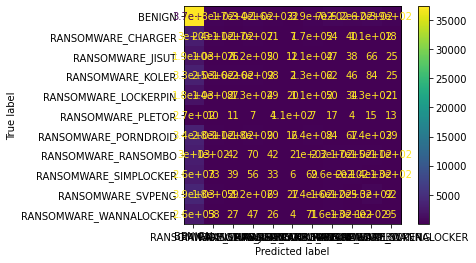

Accuracy: 0.5135551488498861
[[36491   752   370   711   297    37   728   440   333   657   239]
 [ 2782   366   117   174    95    22   139    65    54   107    34]
 [ 1832   135   119   136    63     9   104    33    35    84    17]
 [ 3160   218   188   293    79    41   220    69    57    90    41]
 [ 1756   163   122   139    68     9   101    40    38    79    16]
 [  237     8    16    11     8   130     5    18     5    28     5]
 [ 3128   247    90   213   156     6   336   119    75   183    55]
 [ 2735   120    45    86    52     7    96   322   212   157   154]
 [ 2590   104    42   110    41     1    91   214   157   140   144]
 [ 3868   178    73   101    63    11   103   154   166   631    68]
 [ 2559    74    32    60    20     3    61   156   119    95    91]]


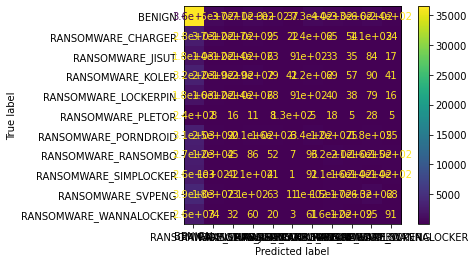

Accuracy: 0.5155828253169891
[[36782   617   346   682   263    31   609   490   383   560   292]
 [ 2705   391   112   184    76    20   177    73    71   109    37]
 [ 1911   133    76   121    49    20   108    45    20    56    28]
 [ 3187   242   159   283   114     5   201    69    69    87    40]
 [ 1797   151    80   140    76     0   147    42    29    54    14]
 [  250    11     6     7     6   127     5    19    14    17    10]
 [ 3331   283   135   187    94    10   281    74    79    85    49]
 [ 2977   105    45    63    34     9    83   267   189    97   117]
 [ 2645    92    30    70    32     5    69   234   221   117   119]
 [ 3879   152   102   138    70    16   151   166   151   510    81]
 [ 2427    77    54    69    37     3    58   163   137   101   144]]


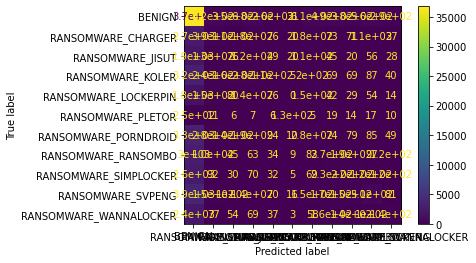

Accuracy: 0.520494015721076
[[37128   460   208   492   200    35   465   489   376   922   280]
 [ 2650   409   121   189    95     6   216    88    47   101    33]
 [ 1829   145   109   143    47     3   107    65    30    64    25]
 [ 3156   227   128   333   122    18   169    81    74   109    39]
 [ 1810   129    62   102    90     4   134    55    38    91    15]
 [  218    12    10     4     5   168     9     7     4    32     3]
 [ 3548   220    87   190   103     3   176    85    76    97    23]
 [ 3020   108    39    65    24     8    62   243   169   170    78]
 [ 2748    62    29    71    27     6    56   230   191   112   102]
 [ 4000   163    55   119    53    15   140   139   121   556    55]
 [ 2426    64    59    68    27     2    71   186   151    88   128]]


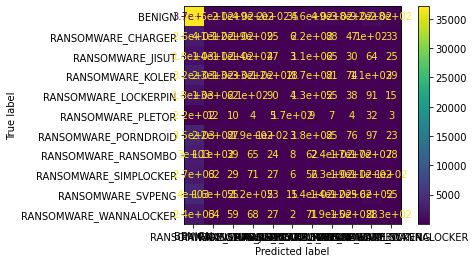

Accuracy: 0.5293552252169219
[[36428   779   399   918   334    45   692   425   301   506   228]
 [ 2698   362   127   216    82    20   182    75    56    98    39]
 [ 1803   167   110   131    72     7   100    37    38    63    39]
 [ 2087   153    72  1578    50     8   338    47    26    76    21]
 [ 1805   144    76   182    55     4   101    38    38    72    15]
 [  215    21    13    10     9   146    14    11     2    26     5]
 [ 3291   282   108   213   116    29   293    75    56   109    36]
 [ 3035    94    42    75    35     5    66   251   168   108   107]
 [ 2597    88    37   116    42     4    97   247   194   107   105]
 [ 3624   177    98   185    84    25   128   171   146   702    76]
 [ 2634    50    19    56    21     3    60   162   106    74    85]]


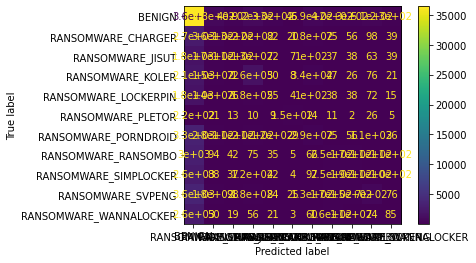

Accuracy: 0.5530685064977814
[[37387   386   171   390   128    31   446   523   394   879   320]
 [ 2737   389   113   185    78     4   224    68    34    98    25]
 [ 1811   148   107   154    70     5    95    45    47    63    22]
 [ 1861   100    38  2144    49     0   102    32    27    76    26]
 [ 1778   116    77   173    90     1   125    36    38    87    10]
 [  214    11    11    15    11   150    15     3     1    38     3]
 [ 2193   197   101  1390    56    23   484    35    35    76    18]
 [ 2852   106    38    91    34     5   147   294   171   135   113]
 [ 2557    87    47    58    32     4    98   276   214   148   113]
 [ 3735   181    65   166    81    10   183   188   115   613    79]
 [ 2327    60    39    69    42     4    58   247   194    97   133]]


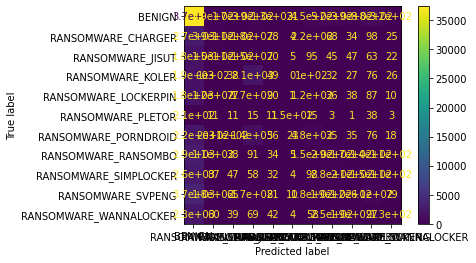

Accuracy: 0.534727251181714
[[36791   677   355   703   247    30   652   410   269   690   231]
 [ 2780   386   105   170    68    11   188    59    63    97    28]
 [ 1882   145    82   147    47    20    86    36    27    71    24]
 [ 2957   226    92   644    62     9   186    43    46   159    31]
 [ 1778   147    96   136    73    22    88    32    60    87    12]
 [  224    17     7    14     4   151    10     7     2    35     1]
 [ 3139   236   115   181    81    11   553    85    51   106    50]
 [ 2926   107    43    75    43     9    96   237   184   148   118]
 [ 2503    99    51    81    42     9    74   306   219   135   115]
 [ 3287   138    63   105    46    29   136   118    97  1336    61]
 [ 2401    62    41    70    24     0    53   216   165    98   140]]


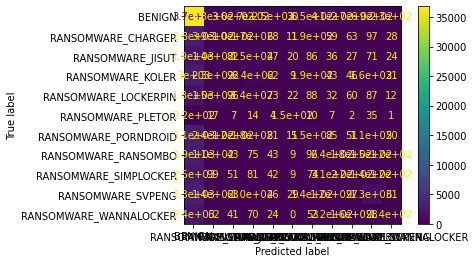

Accuracy: 0.529144557532028
[[37174   509   257   483   212    18   492   480   351   796   282]
 [ 2785   394   115   155    71     0   173    83    53   100    27]
 [ 1860   144    96   124    50     4    99    44    44    84    18]
 [ 3164   249   115   316   112     7   194    73    58   144    23]
 [ 1734   179    62    90    74     2   174    70    27    94    25]
 [  233    20     8    14     3   133     4     3     3    48     2]
 [ 3379   237    99   207    82    12   260   109    62   138    24]
 [ 2906    95    38    76    52     6   104   285   187   144    93]
 [ 2667    84    23    54    22     6    66   269   198   109   136]
 [ 3501   126    75   101    50    44    99   153   111  1093    63]
 [ 2356    80    46    74    35    10    53   204   133   114   165]]


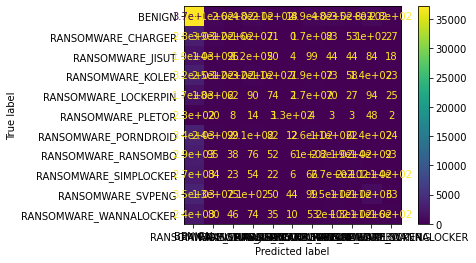

Accuracy: 0.505009940881381
[[36082   600   350   592   230    97   548   604   419  1223   309]
 [ 2621   412   112   186   115     4   213    81    50   130    31]
 [ 1822   169   107   157    54     8    86    33    42    66    24]
 [ 3068   246   138   326   126     6   195    78    74   153    45]
 [ 1892   151    72   121    52     5    83    30    36    72    17]
 [  264    13    13    20     4    92    20     7     3    32     3]
 [ 3366   265   118   227   123     6   196    75    35   155    43]
 [ 2783   115    38    73    35     8    91   240   302   148   152]
 [ 2655    88    31    88    36     5   107   173   197   180    74]
 [ 3881   155    86   125    78    24   213   179    96   509    71]
 [ 2451    70    34    59    15     8    49   167   179    96   142]]


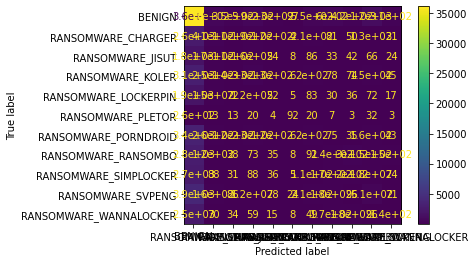

Overall Accuracy: 0.5235598578521667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X1, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X1.loc[train_index], X1.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

Accuracy: 0.475852534562212
[[30121  1359   917  1393   829    37  1615  1323  1114  1215  1132]
 [ 1142   698   234   495   263    12   494   127   148   235   107]
 [  621   349   322   392   236    15   267    85   113    94    74]
 [ 1433   450   444   603   319    20   481   162   138   273   132]
 [  737   280   242   404   183     6   321    87    92   134    45]
 [   52    31    24    20    21   178    22    18    11    86     8]
 [ 1217   553   339   511   354    17   850   180   173   274   140]
 [ 1229   197   123   129   103    21   218   636   572   279   479]
 [ 1092   114   104   140    80    14   122   578   566   290   534]
 [ 1876   227   145   334   224    65   321   260   267  1451   246]
 [  933   100   117   119    81    10   139   483   513   243   533]]


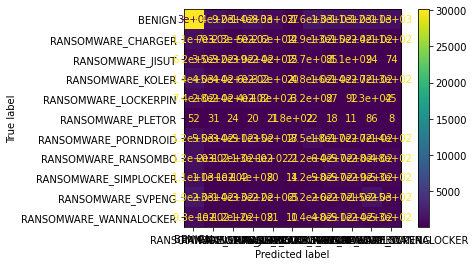

Accuracy: 0.486142016353079
[[31143   769   437   697   494    43   928  1805  1647  1456  1636]
 [ 1328   571   271   390   318     9   447   151   124   230   116]
 [  815   286   267   248   206    20   255   144    78   150    98]
 [ 1462   512   423   571   329    10   500   145   171   188   145]
 [  643   292   226   340   193    31   271   122   120   219    74]
 [   57    17    12    20    13   209    20    40    21    37    25]
 [ 1339   563   314   512   354    22   617   202   211   328   146]
 [ 1142   182   100   178   119    13   207   694   565   368   418]
 [ 1060   150    97   142    94    12   127   626   544   301   481]
 [ 1582   245   138   240   210    80   302   368   330  1585   336]
 [ 1080   128    88   123    79    10   184   414   401   235   528]]


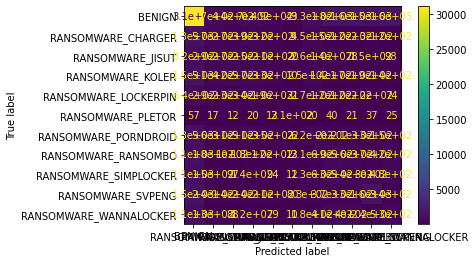

Accuracy: 0.46902526695545693
[[29290  1412   888  1544  1040    57  1840  1345   991  1616  1032]
 [ 1110   657   266   426   287    31   457   184   157   259   121]
 [  720   262   355   264   215    24   286    85    75   193    88]
 [ 1202   499   403   643   350    54   603   136   165   255   146]
 [  605   275   233   337   313    17   340    77    87   152    95]
 [   51    13    21    25    13   196    21    30    20    55    26]
 [ 1329   466   252   497   393    16   716   186   190   442   121]
 [ 1102   172    95   158    99    20   163   681   662   325   509]
 [ 1106   176    90   176   110    15   201   513   526   293   428]
 [ 1552   299   151   217   173    60   241   372   379  1673   299]
 [ 1125   134    87   124    77    17   127   406   392   209   572]]


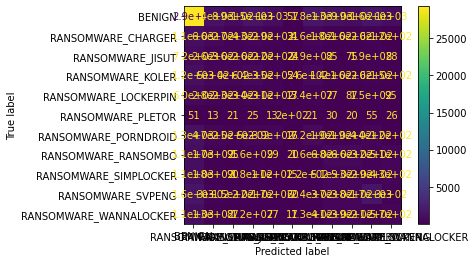

Accuracy: 0.4753321307719654
[[30110  1360   931  1485   773    43  1629  1198  1174  1232  1120]
 [  936   750   327   416   265    34   491   168   179   248   141]
 [  798   273   314   301   174    13   263   117    89   139    86]
 [ 1295   567   407   623   352    16   477   182   181   202   154]
 [  719   265   236   297   253     7   293   139    82   155    84]
 [   55    19    17    12    13   186    25    52    33    20    40]
 [ 1416   552   371   488   334    25   646   210   176   255   135]
 [ 1207   187   100   124    85    18   165   722   602   309   467]
 [ 1093   159    94   124   117    12   161   544   546   256   528]
 [ 1688   293   193   327   196    66   296   334   338  1374   311]
 [ 1020   126    96   128    93    17   137   371   387   318   577]]


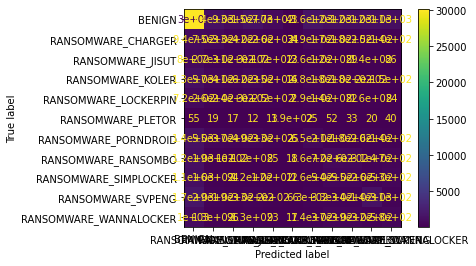

Accuracy: 0.48536517926503314
[[30897  1019   630   960   604    63  1183  1268  1433  1852  1146]
 [ 1094   714   309   404   293    10   432   193   149   241   116]
 [  691   270   322   337   215    13   280    99    91   153    96]
 [ 1295   453   393   701   305    32   487   213   137   286   154]
 [  717   263   174   297   253     5   323    92    97   212    97]
 [   40     7    15     9     7   259    29    10     8    79     9]
 [ 1445   581   310   540   274     8   595   250   184   288   133]
 [ 1367   182   114   127   103    18   213   621   492   341   408]
 [ 1159   130   101   158    86    25   139   583   531   283   439]
 [ 1802   292   196   223   178    50   295   328   333  1458   261]
 [ 1141   110    72   134    64     9   134   452   406   236   512]]


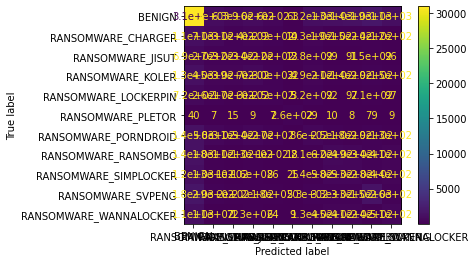

Accuracy: 0.49039487024187284
[[29383  1601  1147  1802  1017    50  1795  1089   949  1307   915]
 [  941   745   315   486   302    22   457   183   152   237   115]
 [  701   276   315   321   227    15   305    74   102   147    84]
 [  748   285   195  2132   259     9   376    91    67   216    78]
 [  750   243   208   335   252    15   264    82    99   200    82]
 [   54    19    19    16    25   194    30    16    19    71     9]
 [ 1385   499   293   439   354    35   722   288   163   264   166]
 [ 1283   166    84   190   125    20   155   699   518   287   459]
 [ 1100   190   117   173   125    11   160   581   517   274   386]
 [ 1391   250   150   268   187    77   309   349   310  1885   240]
 [ 1262   114    92   111    87     7   171   401   385   239   401]]


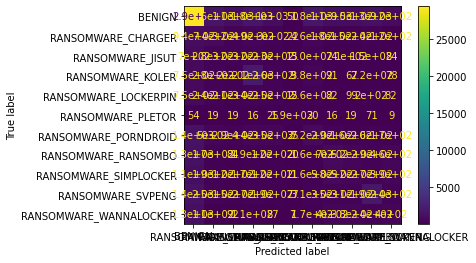

Accuracy: 0.5340030810148916
[[31666   736   464   810   473    40  1041  1402  1080  2153  1190]
 [ 1072   683   283   450   283    17   481   174   152   230   130]
 [  747   263   325   332   182    27   239   116    93   155    88]
 [  704   174   125  2634   157    12   233    90    82   172    72]
 [  673   280   165   321   250    11   381    85   100   189    76]
 [   54    22    10    14    17   231    22    11    13    72     6]
 [  723   329   219  1542   202    38  1185    79    67   146    78]
 [ 1211   189    78   130    90    22   232   775   511   354   394]
 [ 1064   151    88   122    81    14   146   664   629   317   358]
 [ 1561   277   136   292   226    31   374   328   268  1678   245]
 [  917    97    85   112    85    32   127   526   530   258   501]]


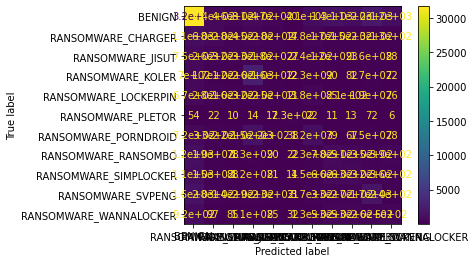

Accuracy: 0.5089204597822223
[[30431  1460   917  1374   797    78  1527  1015   899  1633   924]
 [ 1123   738   272   333   292    33   419   173   152   283   137]
 [  641   297   289   378   226    27   310    74    93   146    86]
 [ 1179   445   253   946   338    17   584   161   123   295   114]
 [  615   311   238   315   281    38   284    86   107   175    81]
 [   64    20    22    23    10   197    31     9    17    69    10]
 [ 1111   423   251   379   219    31  1605   162   128   198   101]
 [ 1241   154   104   151   100    22   177   783   499   302   453]
 [  981   156    92   128    95    24   178   604   624   293   459]
 [ 1418   219   137   199   205    83   255   233   221  2218   228]
 [  950   121    94   131    65    10   121   487   507   244   540]]


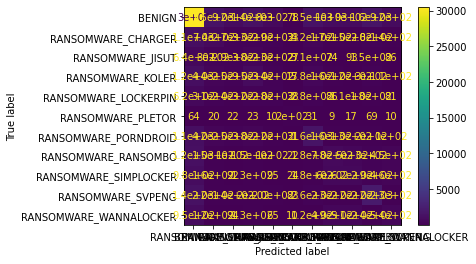

Accuracy: 0.5043779378266995
[[31065  1076   633   964   644    50  1218  1255  1230  1809  1110]
 [ 1091   704   302   405   294    18   449   175   164   248   106]
 [  768   260   306   301   168    23   308    89    91   164    89]
 [ 1286   478   271   787   355    21   507   174   149   312   115]
 [  751   346   182   201   236     2   331   124    83   171   104]
 [   59    17    15    19    26   193    31    15     9    73    14]
 [ 1389   463   288   521   321    39   713   175   159   363   178]
 [ 1259   181   117   135    91    30   187   720   514   356   396]
 [ 1033   122    86   100    94    17   135   627   614   274   532]
 [ 1217   220   168   203   152    96   224   248   260  2386   242]
 [  880   135   112   137    83    26   111   486   465   252   583]]


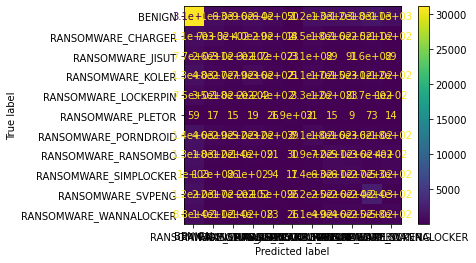

Accuracy: 0.4743051258081081
[[30176  1102   825  1093   778   247  1273  1114  1048  2268  1130]
 [ 1000   649   284   401   292    32   578   158   162   266   133]
 [  698   330   248   364   214    20   274    87    89   154    90]
 [ 1206   456   349   675   408    11   596   176   150   313   115]
 [  691   285   230   287   286    10   306    97    93   171    75]
 [   65    28    22    19    14   156    47    12    11    82    15]
 [ 1361   467   298   507   357    18   752   174   140   356   179]
 [ 1126   176    88   152    82    12   178   650   682   312   527]
 [ 1168   175    78   163   124    23   263   376   406   496   362]
 [ 1636   274   155   212   177    91   398   401   298  1494   281]
 [  925   123   105   125    81    10   119   445   569   237   531]]


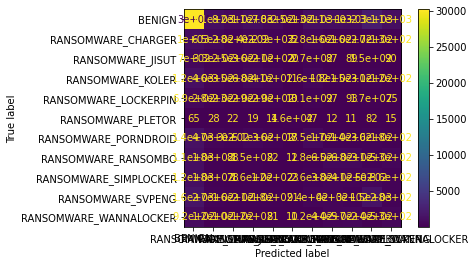

Overall Accuracy: 0.49037184114097465


In [ ]:
from sklearn.tree import DecisionTreeClassifier
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X1, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X1.loc[train_index], X1.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = DecisionTreeClassifier(random_state=0)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

In [ ]:
# Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
# feature extraction
test = SelectFpr(score_func=f_classif, alpha=0.05)
fit = test.fit(X2, y)
# summarize scores
np.set_printoptions(precision=3)
#print(fit.scores_)
dictt = []
i=0
for col in X2.columns:
    score = fit.scores_[i]
    #print(score)
    i+=1
    if not math.isnan(float(score)):
        dictt.append([col, score])    
    
#dictt = sorted(dictt, key=operator.itemgetter(1), reverse=True)
dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

outstr = ''

i=1
for col, score in dictt[:10]:
    #if not math.isnan(float(score)):
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1
    
    outstr += '\'' + col + '\', '

print(outstr)


1	Active Max	792.1052865545622
2	Active Std	656.7384388577657
3	Destination Port	635.6546605339962
4	Active Mean	541.8327646052101
5	act_data_pkt_fwd	516.1680732041369
6	Total Length of Fwd Packets	445.09634525826687
7	Subflow Fwd Bytes	445.09634525826687
8	Source Port	404.49482594110106
9	URG Flag Count	363.17152802228475
10	Flow IAT Mean	318.7507603887172
'Active Max', 'Active Std', 'Destination Port', 'Active Mean', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Source Port', 'URG Flag Count', 'Flow IAT Mean', 


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [33 34 35 47 51 52 58 59 60 61 62 63] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
cols_to_keep = ['Active Max', 'Active Std', 'Destination Port', 'Active Mean', 'act_data_pkt_fwd', 'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Source Port', 'URG Flag Count', 'Flow IAT Mean',
                    'Label']
print('Dropping unnecessary columns...')
df2.drop(columns=[col for col in df2.columns if col not in cols_to_keep], inplace=True, errors='raise') 
df2.dropna(inplace=True)

Dropping unnecessary columns...


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759491 entries, 0 to 759490
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  759491 non-null  int64  
 1   Destination Port             759491 non-null  int64  
 2   Total Length of Fwd Packets  759491 non-null  int64  
 3   Flow IAT Mean                759491 non-null  float64
 4   URG Flag Count               759491 non-null  int64  
 5   Subflow Fwd Bytes            759491 non-null  int64  
 6   act_data_pkt_fwd             759491 non-null  int64  
 7   Active Mean                  759491 non-null  float64
 8   Active Std                   759491 non-null  float64
 9   Active Max                   759491 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 63.7 MB


Accuracy: 0.5475444371296906
[[36494   656   361   682   321    10   654   577   427   469   404]
 [ 1954   570   158   373   164    13   341    79   103   150    50]
 [ 1159   254   275   344   132     5   174    54    53    68    50]
 [ 2301   352   316   530   213    13   347    84    84   145    70]
 [ 1324   229   137   305    99     2   233    51    51    74    26]
 [   84    19    19    28    11   183    18     9    10    79    11]
 [ 2101   473   265   372   223    12   638   144    96   205    79]
 [ 2005   106    57    59    50    17   145   546   502   168   331]
 [ 1673    80    67    82    47    12    62   527   464   207   413]
 [ 2783   154    95   193   154    48   214   132   134  1330   179]
 [ 1577    56    64    76    43    11    87   360   377   163   457]]


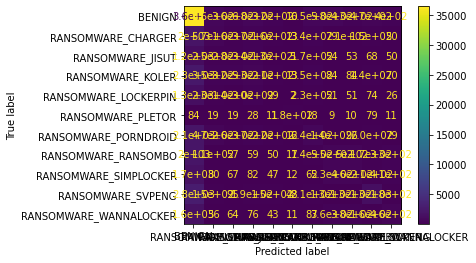

Accuracy: 0.5548855152799905
[[37264   243   154   302   142    15   353   715   667   595   605]
 [ 2179   386   164   322   166     8   350    94    70   163    53]
 [ 1344   189   200   217   107    18   221    71    61    86    53]
 [ 2398   372   344   490   184     3   302    68   123    98    74]
 [  974   239   185   314   121    18   255    84    80   199    62]
 [   88    16    11    14     5   225     4    30    19    31    28]
 [ 2233   502   199   412   225    20   501   141    98   203    74]
 [ 2023   124    59    79    55    12   145   583   406   210   290]
 [ 1718    85    57    97    48     5    83   545   475   182   339]
 [ 2642   153    82   143    94    69   168   231   189  1479   166]
 [ 1830    67    39    52    40     4   111   290   285   133   419]]


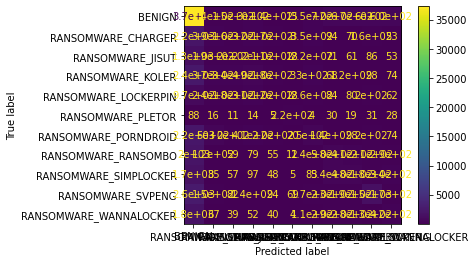

Accuracy: 0.547433145926872
[[36057   643   361   757   381    37   849   503   406   755   306]
 [ 1846   573   177   379   193    18   318   109    93   176    73]
 [ 1228   229   299   202   136    19   202    51    43   106    52]
 [ 1943   398   355   532   199    54   453   104    99   201   118]
 [ 1050   262   200   277   193    19   250    38    50   135    57]
 [   88     9    10    13     9   218     9    31    15    51    18]
 [ 2221   351   132   407   234     7   619   138   104   344    51]
 [ 1761   125    73    93    60    13   100   610   572   223   356]
 [ 1719   112    82   105    68    12   109   453   428   243   303]
 [ 2464   200   107   140    94    32   138   218   252  1602   169]
 [ 1745    73    59    90    47    11    65   322   267   145   446]]


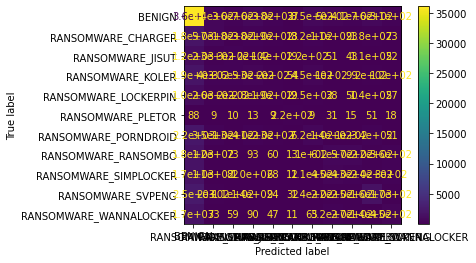

Accuracy: 0.5496056564273394
[[36659   569   327   693   280    13   711   494   449   495   365]
 [ 1600   651   267   352   170    34   352   109   113   218    89]
 [ 1286   231   220   229   127    18   180    55    62   100    59]
 [ 2173   360   325   560   211     9   366   114   106   136    96]
 [ 1325   214   108   253   166     8   239    57    42    85    33]
 [   85    17    16     8    10   203    17    43    26    19    28]
 [ 2241   435   293   409   172    22   526   137   117   161    95]
 [ 1913   127    76    94    46    19   101   609   480   205   316]
 [ 1821    87    63    86    54     9    92   393   481   176   372]
 [ 2637   171   103   180   137    40   196   280   255  1255   162]
 [ 1692    73    63    78    54    13    77   286   235   287   412]]


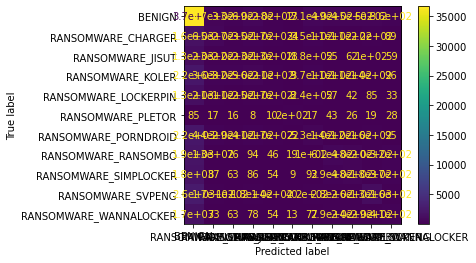

Accuracy: 0.5552673504588606
[[37186   341   226   429   193    33   470   486   428   921   342]
 [ 1806   624   221   296   191     4   368   129    98   155    63]
 [ 1095   216   286   257   163    10   224    78    77    84    77]
 [ 1980   371   318   595   226    24   387   138   101   210   106]
 [ 1180   198   117   209   179     5   293    69    69   160    51]
 [   60    12    10     7     6   279    18     2     4    70     4]
 [ 2422   508   183   363   177    11   459   140    99   176    70]
 [ 2173   131    55    84    45    12    89   529   373   227   268]
 [ 1852    88    49    87    44    17    76   481   415   190   335]
 [ 2907   228    84   123    77    41   190   187   189  1247   143]
 [ 1931    43    31    63    27     4    78   340   229   151   373]]


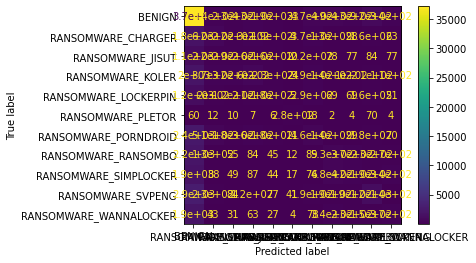

Accuracy: 0.5695927530316397
[[36314   660   434   847   337    21   840   418   376   493   315]
 [ 1652   617   227   401   167    25   392   113   100   199    62]
 [ 1200   230   238   281   135     8   215    58    52    91    59]
 [ 1342   213   140  2048   156    13   304    33    39   120    48]
 [ 1157   216   156   285   154    12   223    70    63   142    52]
 [   65    19    14    11     4   223    34    11     7    74    10]
 [ 2316   383   188   320   213    42   650   177    82   167    70]
 [ 2020   119    65   114    58    16    96   569   417   182   330]
 [ 1819   107    53    93    58     8    82   530   418   181   285]
 [ 2165   195   118   213   115    71   219   219   220  1737   144]
 [ 1884    92    45    62    46     3    95   309   281   161   292]]


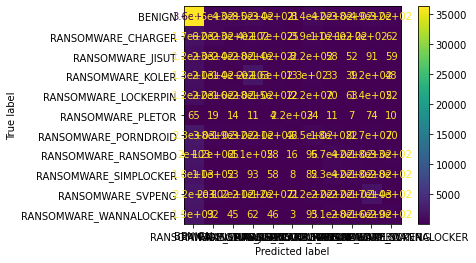

Accuracy: 0.6024700786053799
[[37574   248   143   275   145    21   385   539   408   924   393]
 [ 1903   595   173   319   178    13   380   112    75   153    54]
 [ 1155   254   238   267   156    13   188    69    54   108    65]
 [ 1152   127    64  2598    77     1   178    36    50   121    51]
 [ 1204   172   102   284   157     9   350    38    55   121    39]
 [   75    10    15    14    21   216    17     6     6    92     0]
 [ 1181   249   176  1487   132    33  1115    60    32   104    39]
 [ 1982   106    47    80    48    18   166   676   380   208   275]
 [ 1736   109    42    74    52     9   107   562   518   197   228]
 [ 2384   168    65   208   143    16   308   193   178  1606   147]
 [ 1426    59    57    78    44    11    63   486   410   172   464]]


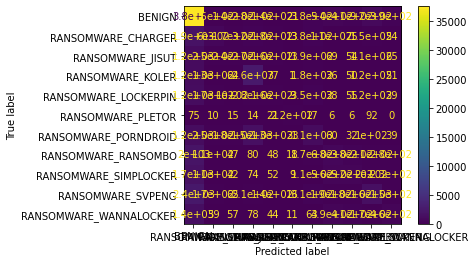

Accuracy: 0.5794414673004253
[[36556   641   380   684   299    21   703   362   322   756   331]
 [ 1851   625   185   267   157    19   354    99    87   224    87]
 [ 1164   236   245   288   147    22   214    38    54   101    58]
 [ 2129   295   129   845   180    13   487    69    63   197    48]
 [ 1066   253   190   262   186    21   205    75    68   146    59]
 [   73    25    15    12     7   227    18    12    10    69     4]
 [ 1866   297   161   284   149    26  1530    80    46   115    54]
 [ 2020    99    54    83    60    15   133   637   368   213   304]
 [ 1592   100    58   109    52    13    96   576   543   210   285]
 [ 2211   113    76   130    77    65   193   145   134  2173    99]
 [ 1527    67    62    87    39     9    78   401   415   144   441]]


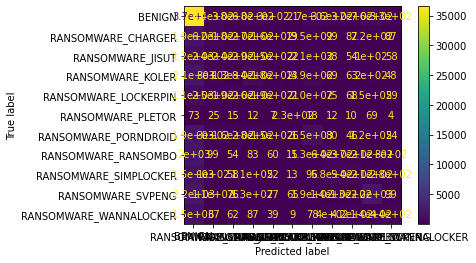

Accuracy: 0.5681312459676888
[[37001   459   253   414   236    18   526   502   440   837   368]
 [ 1860   578   218   302   164    11   359   136    80   172    76]
 [ 1221   184   213   312   124    15   209    73    62    94    60]
 [ 2090   363   190   691   237    12   369    85   105   238    75]
 [ 1265   232   107   168   142     3   332    61    53   123    45]
 [   92    12    17    23    15   208    17     6     5    72     4]
 [ 2238   351   160   362   241    34   657   116   112   253    85]
 [ 2004   121    45    66    46    17   147   658   378   240   264]
 [ 1652    88    61    77    46    13    88   563   476   180   390]
 [ 2274   147    92   133    77    76   127   181   180  2016   113]
 [ 1403    68    66   114    46    21    68   423   386   166   509]]


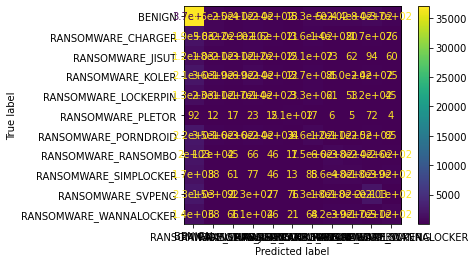

Accuracy: 0.5422849543772795
[[36061   518   329   514   309   170   526   501   431  1315   380]
 [ 1663   592   201   331   162    27   504   126   103   189    57]
 [ 1104   279   261   312   125     9   176    71    82    99    50]
 [ 1965   404   224   619   251    12   443   122   114   222    79]
 [ 1095   296   140   252   181    10   204    75    74   150    54]
 [   77    17    17    14    11   181    52    13     4    77     8]
 [ 2251   342   208   433   287    19   559   117    74   247    72]
 [ 1752    97    59    97    49    14   131   571   626   220   369]
 [ 1770   102    51    97    61    24   209   256   347   497   220]
 [ 2579   187    92   128   107    55   314   273   183  1373   126]
 [ 1458    93    63    89    55     6    68   392   428   177   441]]


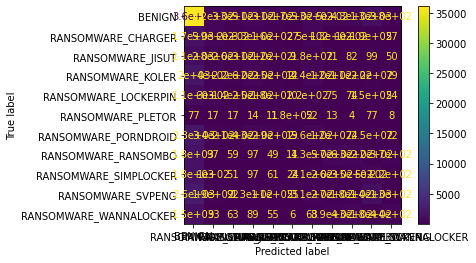

Overall Accuracy: 0.5616656418575072


In [ ]:
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X2, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X2.loc[train_index], X2.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

Accuracy: 0.5162870309414088
[[36777   728   383   686   228    28   644   455   389   491   246]
 [ 2674   406   109   241    93     4   188    60    60    91    29]
 [ 1853   186   106   145    50     3    99    36    26    43    21]
 [ 3243   254   143   299    93    10   199    65    47    76    26]
 [ 1754   157    81   157    60     3   123    46    42    93    15]
 [  235    14     9    15     9   125     9    12     7    36     0]
 [ 3166   296   160   209   100    13   340    99    65   127    33]
 [ 2906    98    45    87    62     4   133   239   211   108    93]
 [ 2602    93    43    79    23    12    44   224   239   140   135]
 [ 4036   147    83   148    89    26   125   116    96   486    64]
 [ 2432    54    40    59    23     6    64   185   155   118   135]]


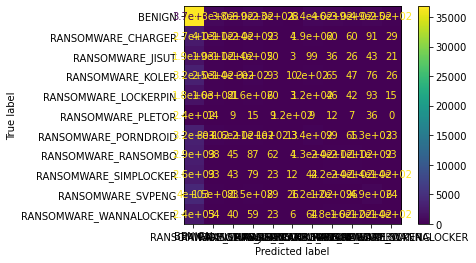

Accuracy: 0.518374172141832
[[37334   376   173   341   165    32   394   703   518   625   394]
 [ 2974   238   108   170    71     7   167    54    40   108    18]
 [ 1923   105    76   116    50    12   109    47    38    66    25]
 [ 3330   253   165   262    98     2   129    62    46    84    25]
 [ 1754   144    87   131    49    20   110    50    34   131    21]
 [  269    10    11     7     4   114     7    17     4    15    13]
 [ 3366   275   108   181    90    16   244    84    67   138    39]
 [ 2969   100    42    70    42     2   100   228   171   153   109]
 [ 2637    73    39    56    33     6    69   256   198   138   129]
 [ 3917   181    59   120    69    27   137   160   122   532    92]
 [ 2551    58    27    47    26     4    71   159   131   101    95]]


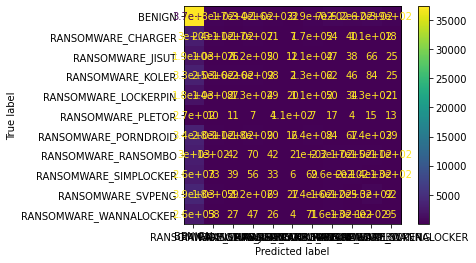

Accuracy: 0.5135551488498861
[[36491   752   370   711   297    37   728   440   333   657   239]
 [ 2782   366   117   174    95    22   139    65    54   107    34]
 [ 1832   135   119   136    63     9   104    33    35    84    17]
 [ 3160   218   188   293    79    41   220    69    57    90    41]
 [ 1756   163   122   139    68     9   101    40    38    79    16]
 [  237     8    16    11     8   130     5    18     5    28     5]
 [ 3128   247    90   213   156     6   336   119    75   183    55]
 [ 2735   120    45    86    52     7    96   322   212   157   154]
 [ 2590   104    42   110    41     1    91   214   157   140   144]
 [ 3868   178    73   101    63    11   103   154   166   631    68]
 [ 2559    74    32    60    20     3    61   156   119    95    91]]


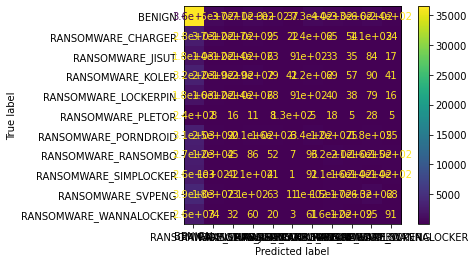

Accuracy: 0.5155828253169891
[[36782   617   346   682   263    31   609   490   383   560   292]
 [ 2705   391   112   184    76    20   177    73    71   109    37]
 [ 1911   133    76   121    49    20   108    45    20    56    28]
 [ 3187   242   159   283   114     5   201    69    69    87    40]
 [ 1797   151    80   140    76     0   147    42    29    54    14]
 [  250    11     6     7     6   127     5    19    14    17    10]
 [ 3331   283   135   187    94    10   281    74    79    85    49]
 [ 2977   105    45    63    34     9    83   267   189    97   117]
 [ 2645    92    30    70    32     5    69   234   221   117   119]
 [ 3879   152   102   138    70    16   151   166   151   510    81]
 [ 2427    77    54    69    37     3    58   163   137   101   144]]


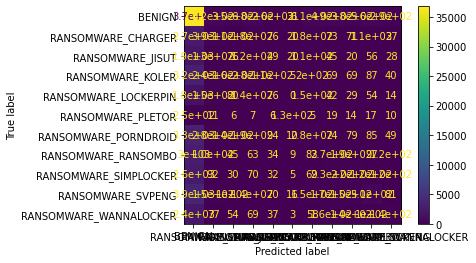

Accuracy: 0.520494015721076
[[37128   460   208   492   200    35   465   489   376   922   280]
 [ 2650   409   121   189    95     6   216    88    47   101    33]
 [ 1829   145   109   143    47     3   107    65    30    64    25]
 [ 3156   227   128   333   122    18   169    81    74   109    39]
 [ 1810   129    62   102    90     4   134    55    38    91    15]
 [  218    12    10     4     5   168     9     7     4    32     3]
 [ 3548   220    87   190   103     3   176    85    76    97    23]
 [ 3020   108    39    65    24     8    62   243   169   170    78]
 [ 2748    62    29    71    27     6    56   230   191   112   102]
 [ 4000   163    55   119    53    15   140   139   121   556    55]
 [ 2426    64    59    68    27     2    71   186   151    88   128]]


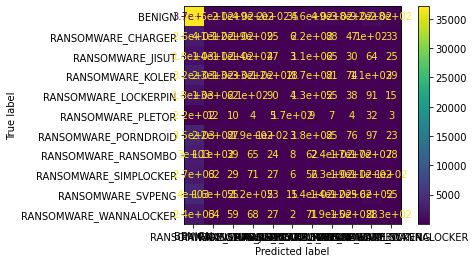

Accuracy: 0.5293552252169219
[[36428   779   399   918   334    45   692   425   301   506   228]
 [ 2698   362   127   216    82    20   182    75    56    98    39]
 [ 1803   167   110   131    72     7   100    37    38    63    39]
 [ 2087   153    72  1578    50     8   338    47    26    76    21]
 [ 1805   144    76   182    55     4   101    38    38    72    15]
 [  215    21    13    10     9   146    14    11     2    26     5]
 [ 3291   282   108   213   116    29   293    75    56   109    36]
 [ 3035    94    42    75    35     5    66   251   168   108   107]
 [ 2597    88    37   116    42     4    97   247   194   107   105]
 [ 3624   177    98   185    84    25   128   171   146   702    76]
 [ 2634    50    19    56    21     3    60   162   106    74    85]]


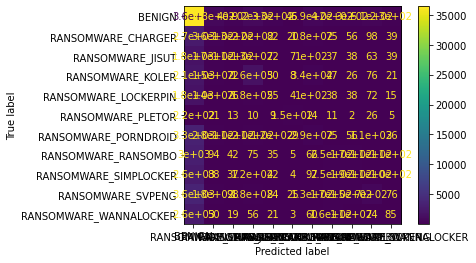

Accuracy: 0.5530685064977814
[[37387   386   171   390   128    31   446   523   394   879   320]
 [ 2737   389   113   185    78     4   224    68    34    98    25]
 [ 1811   148   107   154    70     5    95    45    47    63    22]
 [ 1861   100    38  2144    49     0   102    32    27    76    26]
 [ 1778   116    77   173    90     1   125    36    38    87    10]
 [  214    11    11    15    11   150    15     3     1    38     3]
 [ 2193   197   101  1390    56    23   484    35    35    76    18]
 [ 2852   106    38    91    34     5   147   294   171   135   113]
 [ 2557    87    47    58    32     4    98   276   214   148   113]
 [ 3735   181    65   166    81    10   183   188   115   613    79]
 [ 2327    60    39    69    42     4    58   247   194    97   133]]


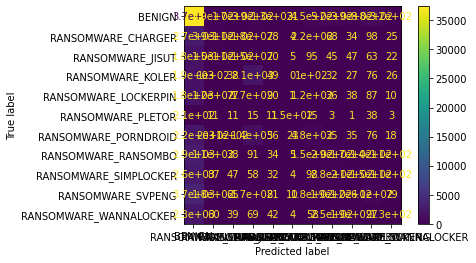

Accuracy: 0.534727251181714
[[36791   677   355   703   247    30   652   410   269   690   231]
 [ 2780   386   105   170    68    11   188    59    63    97    28]
 [ 1882   145    82   147    47    20    86    36    27    71    24]
 [ 2957   226    92   644    62     9   186    43    46   159    31]
 [ 1778   147    96   136    73    22    88    32    60    87    12]
 [  224    17     7    14     4   151    10     7     2    35     1]
 [ 3139   236   115   181    81    11   553    85    51   106    50]
 [ 2926   107    43    75    43     9    96   237   184   148   118]
 [ 2503    99    51    81    42     9    74   306   219   135   115]
 [ 3287   138    63   105    46    29   136   118    97  1336    61]
 [ 2401    62    41    70    24     0    53   216   165    98   140]]


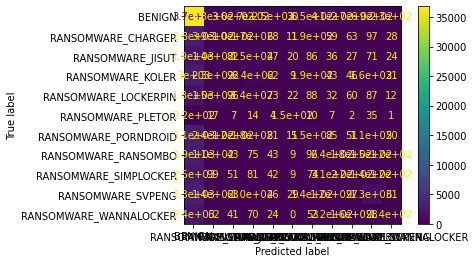

Accuracy: 0.529144557532028
[[37174   509   257   483   212    18   492   480   351   796   282]
 [ 2785   394   115   155    71     0   173    83    53   100    27]
 [ 1860   144    96   124    50     4    99    44    44    84    18]
 [ 3164   249   115   316   112     7   194    73    58   144    23]
 [ 1734   179    62    90    74     2   174    70    27    94    25]
 [  233    20     8    14     3   133     4     3     3    48     2]
 [ 3379   237    99   207    82    12   260   109    62   138    24]
 [ 2906    95    38    76    52     6   104   285   187   144    93]
 [ 2667    84    23    54    22     6    66   269   198   109   136]
 [ 3501   126    75   101    50    44    99   153   111  1093    63]
 [ 2356    80    46    74    35    10    53   204   133   114   165]]


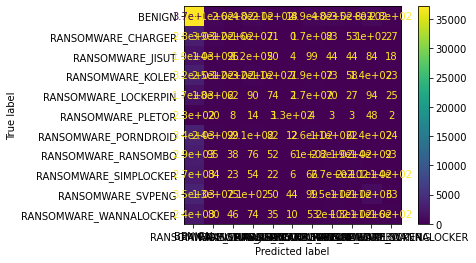

Accuracy: 0.505009940881381
[[36082   600   350   592   230    97   548   604   419  1223   309]
 [ 2621   412   112   186   115     4   213    81    50   130    31]
 [ 1822   169   107   157    54     8    86    33    42    66    24]
 [ 3068   246   138   326   126     6   195    78    74   153    45]
 [ 1892   151    72   121    52     5    83    30    36    72    17]
 [  264    13    13    20     4    92    20     7     3    32     3]
 [ 3366   265   118   227   123     6   196    75    35   155    43]
 [ 2783   115    38    73    35     8    91   240   302   148   152]
 [ 2655    88    31    88    36     5   107   173   197   180    74]
 [ 3881   155    86   125    78    24   213   179    96   509    71]
 [ 2451    70    34    59    15     8    49   167   179    96   142]]


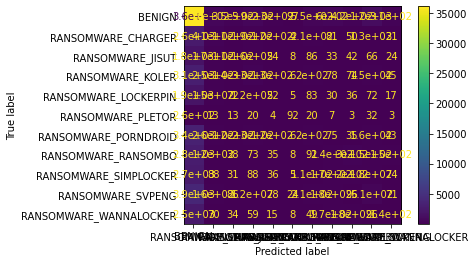

Overall Accuracy: 0.5235598578521667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X2, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X2.loc[train_index], X2.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())

Accuracy: 0.475852534562212
[[30121  1359   917  1393   829    37  1615  1323  1114  1215  1132]
 [ 1142   698   234   495   263    12   494   127   148   235   107]
 [  621   349   322   392   236    15   267    85   113    94    74]
 [ 1433   450   444   603   319    20   481   162   138   273   132]
 [  737   280   242   404   183     6   321    87    92   134    45]
 [   52    31    24    20    21   178    22    18    11    86     8]
 [ 1217   553   339   511   354    17   850   180   173   274   140]
 [ 1229   197   123   129   103    21   218   636   572   279   479]
 [ 1092   114   104   140    80    14   122   578   566   290   534]
 [ 1876   227   145   334   224    65   321   260   267  1451   246]
 [  933   100   117   119    81    10   139   483   513   243   533]]


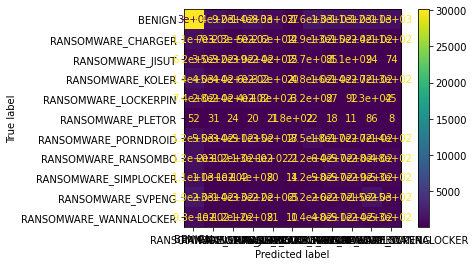

Accuracy: 0.486142016353079
[[31143   769   437   697   494    43   928  1805  1647  1456  1636]
 [ 1328   571   271   390   318     9   447   151   124   230   116]
 [  815   286   267   248   206    20   255   144    78   150    98]
 [ 1462   512   423   571   329    10   500   145   171   188   145]
 [  643   292   226   340   193    31   271   122   120   219    74]
 [   57    17    12    20    13   209    20    40    21    37    25]
 [ 1339   563   314   512   354    22   617   202   211   328   146]
 [ 1142   182   100   178   119    13   207   694   565   368   418]
 [ 1060   150    97   142    94    12   127   626   544   301   481]
 [ 1582   245   138   240   210    80   302   368   330  1585   336]
 [ 1080   128    88   123    79    10   184   414   401   235   528]]


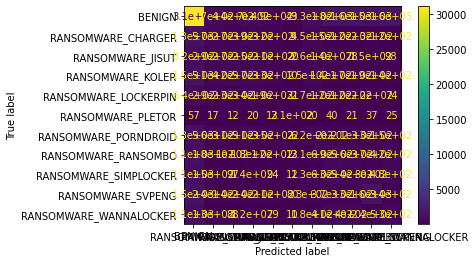

Accuracy: 0.46902526695545693
[[29290  1412   888  1544  1040    57  1840  1345   991  1616  1032]
 [ 1110   657   266   426   287    31   457   184   157   259   121]
 [  720   262   355   264   215    24   286    85    75   193    88]
 [ 1202   499   403   643   350    54   603   136   165   255   146]
 [  605   275   233   337   313    17   340    77    87   152    95]
 [   51    13    21    25    13   196    21    30    20    55    26]
 [ 1329   466   252   497   393    16   716   186   190   442   121]
 [ 1102   172    95   158    99    20   163   681   662   325   509]
 [ 1106   176    90   176   110    15   201   513   526   293   428]
 [ 1552   299   151   217   173    60   241   372   379  1673   299]
 [ 1125   134    87   124    77    17   127   406   392   209   572]]


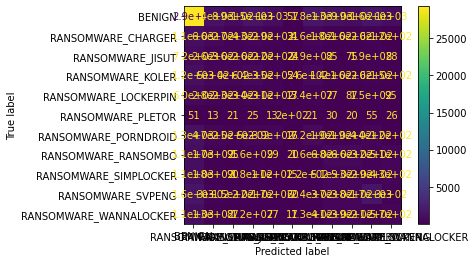

Accuracy: 0.4753321307719654
[[30110  1360   931  1485   773    43  1629  1198  1174  1232  1120]
 [  936   750   327   416   265    34   491   168   179   248   141]
 [  798   273   314   301   174    13   263   117    89   139    86]
 [ 1295   567   407   623   352    16   477   182   181   202   154]
 [  719   265   236   297   253     7   293   139    82   155    84]
 [   55    19    17    12    13   186    25    52    33    20    40]
 [ 1416   552   371   488   334    25   646   210   176   255   135]
 [ 1207   187   100   124    85    18   165   722   602   309   467]
 [ 1093   159    94   124   117    12   161   544   546   256   528]
 [ 1688   293   193   327   196    66   296   334   338  1374   311]
 [ 1020   126    96   128    93    17   137   371   387   318   577]]


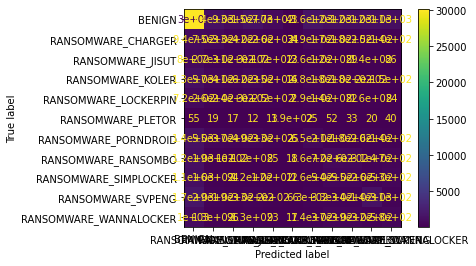

Accuracy: 0.48536517926503314
[[30897  1019   630   960   604    63  1183  1268  1433  1852  1146]
 [ 1094   714   309   404   293    10   432   193   149   241   116]
 [  691   270   322   337   215    13   280    99    91   153    96]
 [ 1295   453   393   701   305    32   487   213   137   286   154]
 [  717   263   174   297   253     5   323    92    97   212    97]
 [   40     7    15     9     7   259    29    10     8    79     9]
 [ 1445   581   310   540   274     8   595   250   184   288   133]
 [ 1367   182   114   127   103    18   213   621   492   341   408]
 [ 1159   130   101   158    86    25   139   583   531   283   439]
 [ 1802   292   196   223   178    50   295   328   333  1458   261]
 [ 1141   110    72   134    64     9   134   452   406   236   512]]


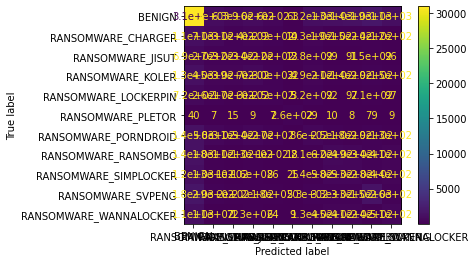

Accuracy: 0.49039487024187284
[[29383  1601  1147  1802  1017    50  1795  1089   949  1307   915]
 [  941   745   315   486   302    22   457   183   152   237   115]
 [  701   276   315   321   227    15   305    74   102   147    84]
 [  748   285   195  2132   259     9   376    91    67   216    78]
 [  750   243   208   335   252    15   264    82    99   200    82]
 [   54    19    19    16    25   194    30    16    19    71     9]
 [ 1385   499   293   439   354    35   722   288   163   264   166]
 [ 1283   166    84   190   125    20   155   699   518   287   459]
 [ 1100   190   117   173   125    11   160   581   517   274   386]
 [ 1391   250   150   268   187    77   309   349   310  1885   240]
 [ 1262   114    92   111    87     7   171   401   385   239   401]]


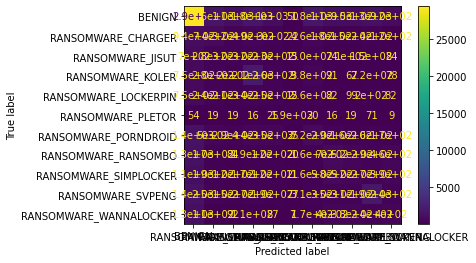

Accuracy: 0.5340030810148916
[[31666   736   464   810   473    40  1041  1402  1080  2153  1190]
 [ 1072   683   283   450   283    17   481   174   152   230   130]
 [  747   263   325   332   182    27   239   116    93   155    88]
 [  704   174   125  2634   157    12   233    90    82   172    72]
 [  673   280   165   321   250    11   381    85   100   189    76]
 [   54    22    10    14    17   231    22    11    13    72     6]
 [  723   329   219  1542   202    38  1185    79    67   146    78]
 [ 1211   189    78   130    90    22   232   775   511   354   394]
 [ 1064   151    88   122    81    14   146   664   629   317   358]
 [ 1561   277   136   292   226    31   374   328   268  1678   245]
 [  917    97    85   112    85    32   127   526   530   258   501]]


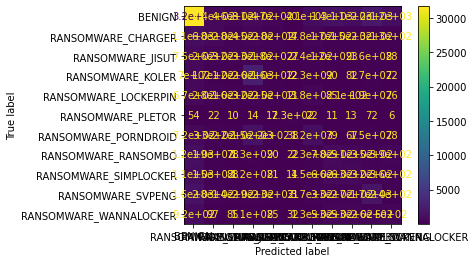

Accuracy: 0.5089204597822223
[[30431  1460   917  1374   797    78  1527  1015   899  1633   924]
 [ 1123   738   272   333   292    33   419   173   152   283   137]
 [  641   297   289   378   226    27   310    74    93   146    86]
 [ 1179   445   253   946   338    17   584   161   123   295   114]
 [  615   311   238   315   281    38   284    86   107   175    81]
 [   64    20    22    23    10   197    31     9    17    69    10]
 [ 1111   423   251   379   219    31  1605   162   128   198   101]
 [ 1241   154   104   151   100    22   177   783   499   302   453]
 [  981   156    92   128    95    24   178   604   624   293   459]
 [ 1418   219   137   199   205    83   255   233   221  2218   228]
 [  950   121    94   131    65    10   121   487   507   244   540]]


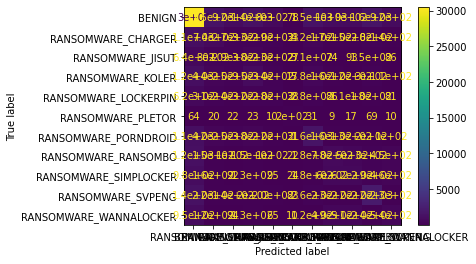

Accuracy: 0.5043779378266995
[[31065  1076   633   964   644    50  1218  1255  1230  1809  1110]
 [ 1091   704   302   405   294    18   449   175   164   248   106]
 [  768   260   306   301   168    23   308    89    91   164    89]
 [ 1286   478   271   787   355    21   507   174   149   312   115]
 [  751   346   182   201   236     2   331   124    83   171   104]
 [   59    17    15    19    26   193    31    15     9    73    14]
 [ 1389   463   288   521   321    39   713   175   159   363   178]
 [ 1259   181   117   135    91    30   187   720   514   356   396]
 [ 1033   122    86   100    94    17   135   627   614   274   532]
 [ 1217   220   168   203   152    96   224   248   260  2386   242]
 [  880   135   112   137    83    26   111   486   465   252   583]]


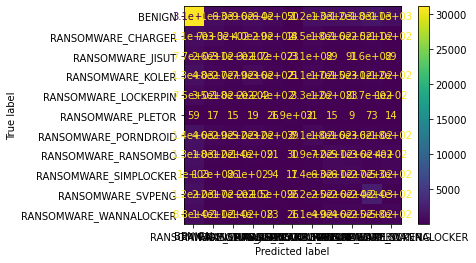

Accuracy: 0.4743051258081081
[[30176  1102   825  1093   778   247  1273  1114  1048  2268  1130]
 [ 1000   649   284   401   292    32   578   158   162   266   133]
 [  698   330   248   364   214    20   274    87    89   154    90]
 [ 1206   456   349   675   408    11   596   176   150   313   115]
 [  691   285   230   287   286    10   306    97    93   171    75]
 [   65    28    22    19    14   156    47    12    11    82    15]
 [ 1361   467   298   507   357    18   752   174   140   356   179]
 [ 1126   176    88   152    82    12   178   650   682   312   527]
 [ 1168   175    78   163   124    23   263   376   406   496   362]
 [ 1636   274   155   212   177    91   398   401   298  1494   281]
 [  925   123   105   125    81    10   119   445   569   237   531]]


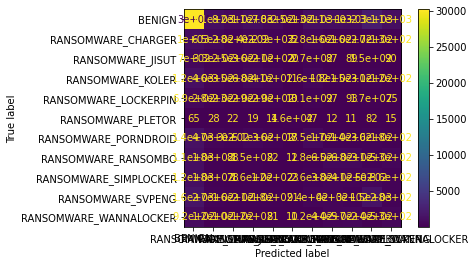

Overall Accuracy: 0.49037184114097465


In [ ]:
from sklearn.tree import DecisionTreeClassifier
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import confusion_matrix



    # blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

    # partition data
for train_index, test_index in skf.split(X2, y):
        # specific ".loc" syntax for working with dataframes
  x_train, x_test = X2.loc[train_index], X2.loc[test_index]
  y_train, y_test = y[train_index], y[test_index]

        # create and fit classifier
  classifier = DecisionTreeClassifier(random_state=0)
  classifier.fit(x_train, y_train)

        # store result from classification
  predictions = classifier.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, predictions)
  print("Accuracy: " + accuracy.__str__())
  cm = confusion_matrix(y_test, predictions)
  print(cm)

  from sklearn.metrics import plot_confusion_matrix
  plot_confusion_matrix(classifier, x_test, y_test)  
  plt.show()

  predicted_y.extend(classifier.predict(x_test))

        # store expected result for this specific fold
  expected_y.extend(y_test)

    # save and print accuracy
accuracy = metrics.accuracy_score(expected_y, predicted_y)
print("Overall Accuracy: " + accuracy.__str__())